# AllLife Personal Loan Campaign
_Supervised Learning - Classification_

__Joseph Reves joe.reves@gmail.com__

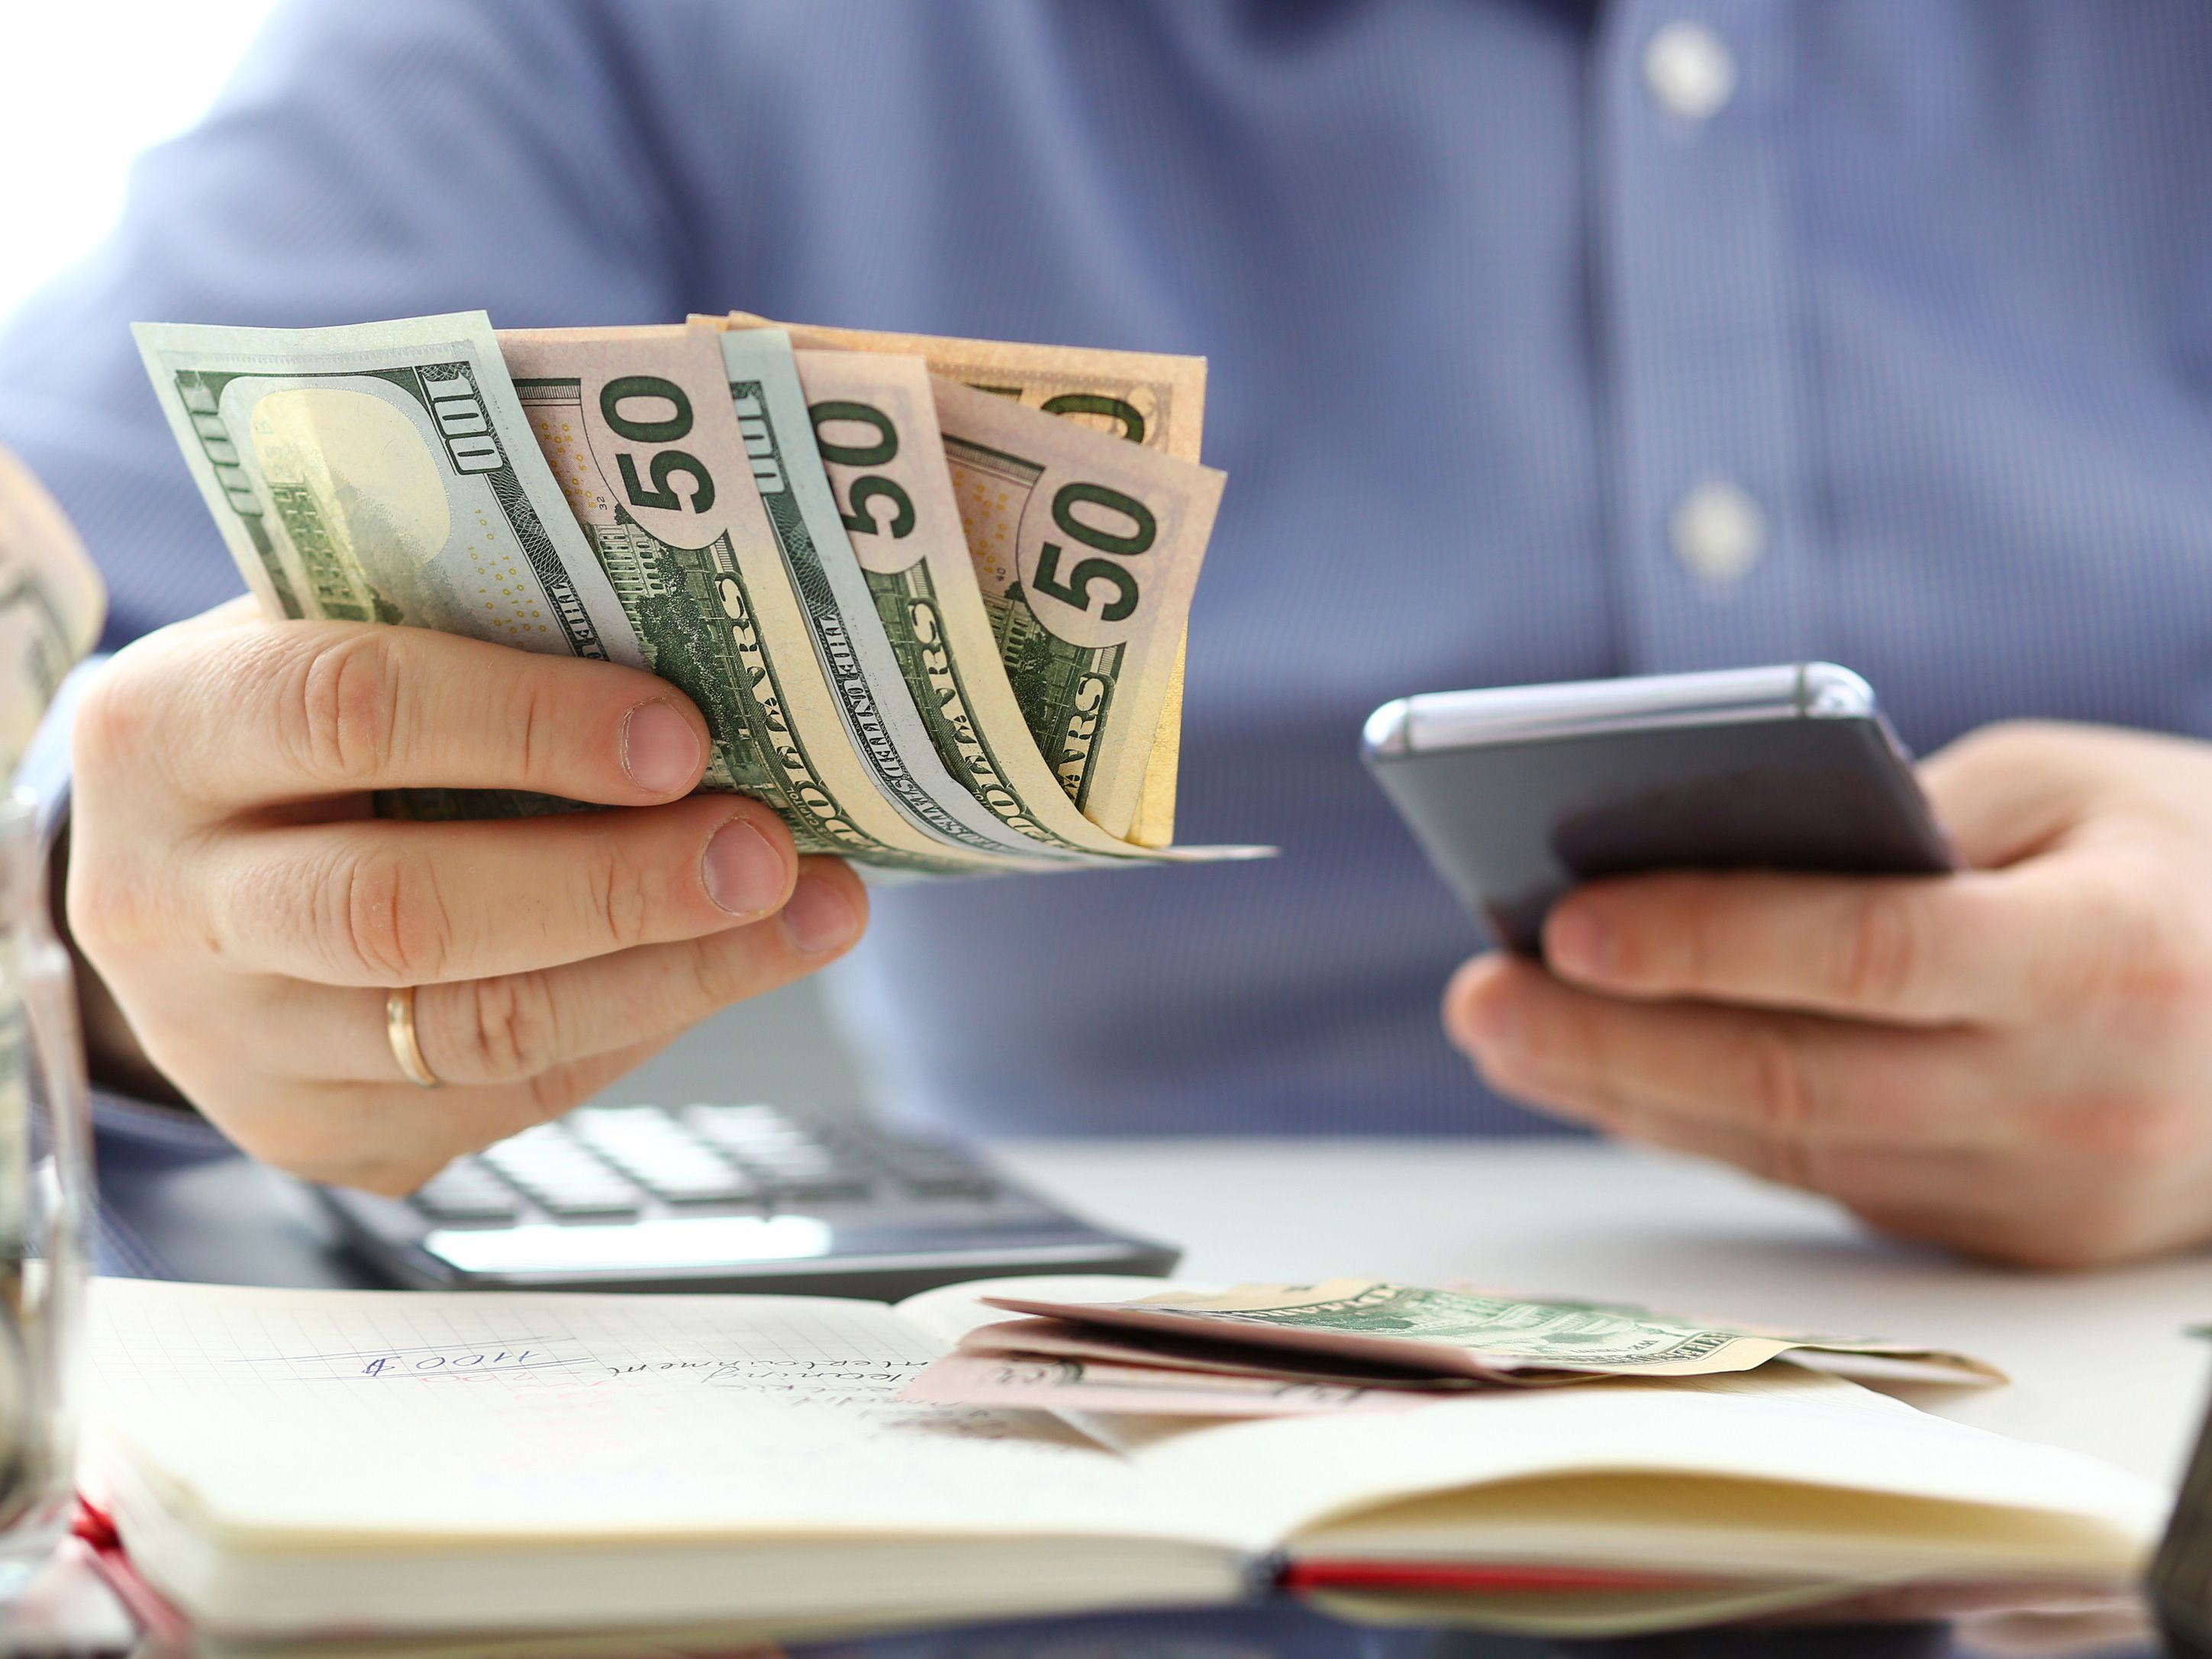

## Context and Objectives:

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

__Objectives__
* Predict the liability customers that are willing and qualified to take out a personal loan.
* Identify the most significant factors to predict loan qualification.
* Identify the target customer segment for the personal loan campaign.

__Data Dictionary__
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing Necessary Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# useful utilities
import pandas_profiling
from uszipcode import SearchEngine

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

<IPython.core.display.Javascript object>

## Explore the characteristics of the data

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "Loan_Modelling.csv" file from the local directory where the notebook is stored. For this project, I'm using Anaconda on my local machine.
</div>

In [2]:
# Reading the loan modeling dataset with the read_csv function from pandas package
customer_data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# Let's make a copy while we explore the data, and potentially make some changes
customers = customer_data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Quick look at a random sample of values in the data
customers.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1125  1126   37          13     172    95003       2    6.5          1   
3671  3672   50          25      18    93106       1    0.4          3   
2438  2439   62          37      29    91030       1    0.3          3   
3378  3379   25           0      44    94536       4    0.6          2   
1862  1863   42          17      82    95616       1    3.7          3   
695    696   29           4     115    92717       1    1.9          1   
1390  1391   29           3      80    94305       4    1.8          2   
4514  4515   24          -3      41    91768       4    1.0          3   
4294  4295   58          34     150    92110       1    7.4          1   
4577  4578   63          37      80    90401       2    1.7          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1125         0              0                   0           0       0   
3671         0              0                   0           0       1   
2438         0              0                   0           0       0   
3378         0              0                   0           0       0   
1862         0              0                   0           0       1   
695          0              0                   0           0       0   
1390         0              0                   0           0       1   
4514         0              0                   0           0       1   
4294       481              0                   0           0       1   
4577         0              0                   0           0       1   

      CreditCard  
1125           0  
3671           0  
2438           1  
3378           1  
1862           0  
695            0  
1390           1  
4514           0  
4294           0  
4577           1

<IPython.core.display.Javascript object>

In [5]:
# Customer ID won't help us analyze the characteristics of target customers - we'll drop this column
customers.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# What's the size and shape of the data?
print(
    "The available data includes",
    customers.shape[0],
    "rows, with",
    customers.shape[1],
    "columns of information",
)

The available data includes 5000 rows, with 13 columns of information


<IPython.core.display.Javascript object>

In [7]:
# How is the data currently typed by python?
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

In [8]:
# check for null values in the data
customers.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

No nulls, but let's see if we have zero values where we don't expect them.
Looking at the data dictionary:
  * `Age` of zero would be invalid. We'll look at outliers later
  * `ZIPCode` should not be zero, but should also not be treated as numeric. We'll revisit that.
  * `Family` should not be zero
  * `Education` should not be zero

For the remaining columns, zero values are valid. 
Let's test these:

In [9]:
# Check for inconsistent zero values
print("Customers with Age of zero:", len(customers.loc[customers["Age"] == 0]))
print("Customers with ZIPCode of zero:", len(customers.loc[customers["ZIPCode"] == 0]))
print("Customers with Family of zero:", len(customers.loc[customers["Family"] == 0]))
print(
    "Customers with Education of zero:", len(customers.loc[customers["Education"] == 0])
)

Customers with Age of zero: 0
Customers with ZIPCode of zero: 0
Customers with Family of zero: 0
Customers with Education of zero: 0


<IPython.core.display.Javascript object>

Ok, that looks pretty clean. We'll use `Personal_Loan` as our dependent variable to help predict the characteristics of customers who accepted a personal loan in our last campaign.

Let's check for duplicate data that might confuse our model.

In [10]:
# list our columns
customers.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

In [11]:
# check our independent variables for duplicates
customers[
    customers.duplicated(
        subset=[
            "Age",
            "Experience",
            "Income",
            "ZIPCode",
            "Family",
            "CCAvg",
            "Education",
            "Mortgage",
            "Securities_Account",
            "CD_Account",
            "Online",
            "CreditCard",
        ],
        keep=False,
    )
].sort_values(by=["ZIPCode"])

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

<IPython.core.display.Javascript object>

__No duplicates found in this subset of columns.__

## Univariate Analysis

### Variables

In [12]:
customers.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

### Observations
* __Summary__
    * In this data, we see about 480 of our customers - 9.6% - accepted personal loans in our last campaign. That's the number to beat for this campaign.
    * Our strongest correlation with `Personal_Loan` is `Income`, not surprisingly
* __Correlations__
    * `Age` and `Experience` - experience is probably more directly useful
    * `Personal_Loan` is correlated with `Income` and `CCAvg` - not surprisingly. Customers who can afford to carry a credit card balance have demonstrated a willingness to use debt.
* __Skewed Data__
    * `Personal_Loan` is categorical, and our dependent variable.  Both `CD_Account` and `Securities_Account` are both skewed, but also both categorical.
* __Zero Values__
    * As noted, there are a number of variables for which zero would not be valid, and we've checked those. There are also several variables where zero values are valid and present in the data:
        * Zero values in `Experience` may indicate students without professional work experience.
        * Zeros in `CCAvg` is an average monthly spending over an unknown period, and may either indicate that the customer doesn't use credit cards, or that they consistently hold a sub-\\$1000 balance.
        * `Mortgage` is almost 70% zeros, which may either indicate the customer owns their home outright (and have paid off a mortgage), or that they rent.
* __Distributions__
    * `Age` looks reasonable, with customers from 23 to 67, and a mean and median both 45.
    * `Experience` includes some outliers that will __need treatment__. Negative values are not valid, and we'll want to match up the larger experience values with age to see if those make sense.
    * `Income` is right-skewed, but the values look reasonable. We have some plausible outliers on the low end
    * `ZIPCode` __needs to be handled as a zip code__, rather than a real number.  We'll investigate and treat that.
    * `Family` is categorical, and correlates weakly with `Age` 
    * `CCAvg` is right-skewed, with a few outliers that spend \\$10K per month
    * `Education` looks good, with a distribution as expected
    * `Mortgage` is extremely right-skewed, with the bulk of the values at zero, and then a distribution that includes balances up to jumbo loans. __This may benefit from a log transformation__ that can gracefully handle the zero values.
    * `Personal_Loan` is categorical, and as noted about 9.6% positive
    * `Securities_Account` is categorical, and about 10.4% positive
    * `CD_Account` is categorical, and about 6% positive
    * `Online` is categorical, and about 59.7% positive
    * `CreditCard` is categorical, and about 29.4% positive

## Data Preprocessing

### Useful Functions

In [13]:
# Defining the function for creating boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, hue=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if (bins) and (hue):
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist2,
            hue=hue,
            bins=bins,
            color="mediumpurple",
        )
    elif bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    elif hue:
        sns.histplot(
            data=data, x=feature, kde=kde, hue=hue, ax=ax_hist2, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [15]:
def missing_values_table(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * miss_val / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}, inplace=True
    )
    miss_val_table = (
        miss_val_table[miss_val_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    return miss_val_table

<IPython.core.display.Javascript object>

### Treatments

__Experience__

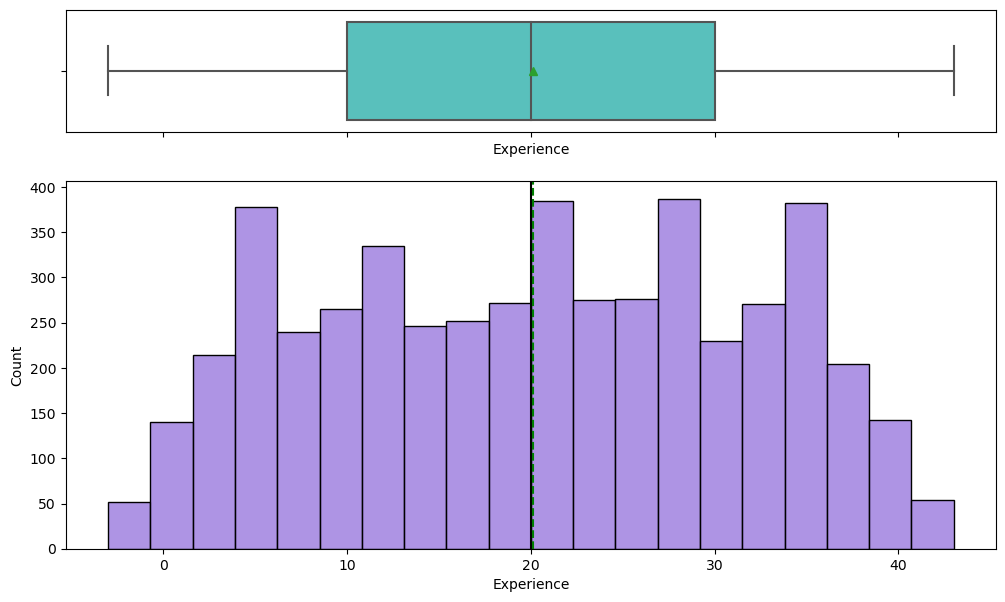

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(customers, "Experience")

In [17]:
# Let's fix the values < 0
customers.loc[customers["Experience"] < 0, "Experience"] = 0

<IPython.core.display.Javascript object>

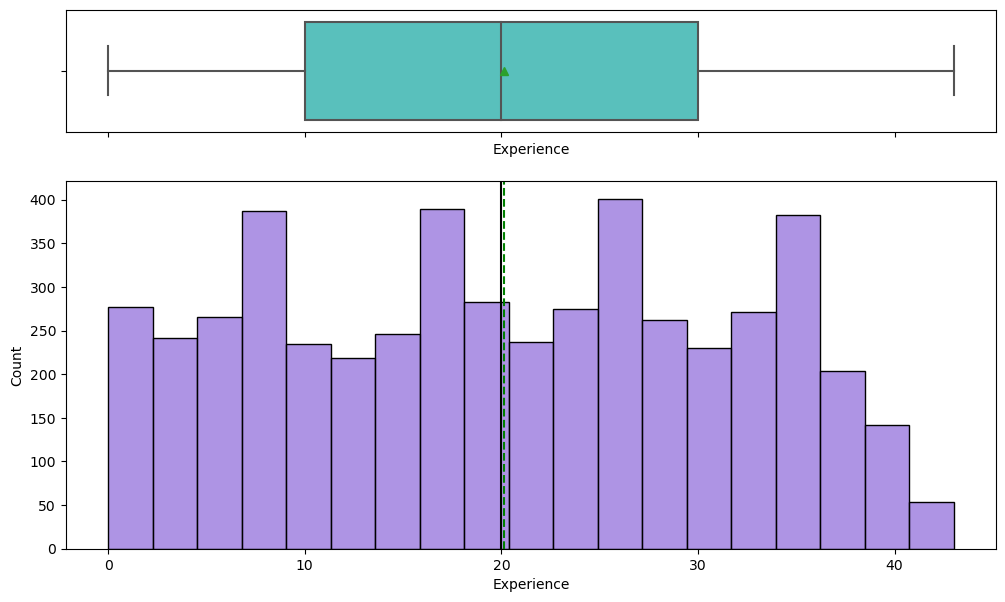

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(customers, "Experience")

__ZIPCode__

We'll do a little feature engineering here. We have the customer's zipcode; from that, we can use the uszipcodes library to look up the median household income from this zip code. This is coming from the most recent census data, so it may be a bit dated. But it should give us a notion of customers living in more or less affluent areas, and may give us some signal we can use to predict candidates for our loan campaign.

We'll also retrieve the county of residence for our customer, by ZIP code. A quick exploration uncovered that all of these zip codes are in the state of California, and we have 467 ZIP codes. These break down into 39 counties, which is more manageable for our analysis and business recommendations.

We'll start by getting a unique list of zip codes in our data, so we only have to look up each zip code once. Then, we'll populate our dataset with a new column of median household incomes and counties for the customer's zip code, and look at the distribution of those values.

In [19]:
# get the ZIP Codes in our dataset
zipCodes = customers.ZIPCode.values.tolist()
# convert to a set to produce a list of unique ZIP Codes
zipCodes_set = set(zipCodes)
len(zipCodes_set)

467

<IPython.core.display.Javascript object>

*Household Incomes*

In [20]:
# Fetch the median household incomes from our unique set of ZIP codes
search = SearchEngine()
Incomes = {}
for zipNum in zipCodes_set:
    if zipNum:
        zipcode = search.by_zipcode(zipNum)
        try:
            Income = zipcode.median_household_income
        except:
            Income = np.NaN
        Incomes[zipNum] = Income

<IPython.core.display.Javascript object>

In [21]:
# Now we'll populate a new column in our dataset with the median household income of each customer, by ZIP code
customers["median_household_income"] = customers.apply(
    lambda row: Incomes[row.ZIPCode], axis=1
)

<IPython.core.display.Javascript object>

In [22]:
# Let's convert the income values to numeric, handling some missing values
pd.to_numeric(customers.median_household_income, errors="coerce")

0       80936.0
1           NaN
2           NaN
3       71625.0
4           NaN
         ...   
4995        NaN
4996    99367.0
4997    62133.0
4998    56946.0
4999    68953.0
Name: median_household_income, Length: 5000, dtype: float64

<IPython.core.display.Javascript object>

In [23]:
# We'll fill any missing values with the median income from the entire customer dataset
customers["median_household_income"] = customers["median_household_income"].fillna(
    customers["median_household_income"].median()
)

<IPython.core.display.Javascript object>

*Counties*

In [24]:
# Fetch the counties from our unique set of ZIP codes, and build another dictionary for that
search = SearchEngine()
Counties = {}
for zipNum in zipCodes_set:
    if zipNum:
        zipcode = search.by_zipcode(zipNum)
        try:
            County = zipcode.county
        except:
            County = "Unknown"
        Counties[zipNum] = County

<IPython.core.display.Javascript object>

In [25]:
# Look at a unique list of counties to get a count
campaign_targets = set(Counties.values())
print("There are", len(campaign_targets), "counties in my target demographic")

There are 39 counties in my target demographic


<IPython.core.display.Javascript object>

In [26]:
# Now we'll populate a new column in our dataset with the county of each customer, by ZIP code
customers["county"] = customers.apply(lambda row: Counties[row.ZIPCode], axis=1)

<IPython.core.display.Javascript object>

In [27]:
# Check for missing values
missing_values_table(customers)

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

<IPython.core.display.Javascript object>

In [28]:
# Let's look at the distribution and characteristics of this data
customers["median_household_income"].describe()

count      5000.00000
mean      77404.93280
std       26736.82439
min       16750.00000
25%       61067.00000
50%       75599.00000
75%       87204.00000
max      250001.00000
Name: median_household_income, dtype: float64

<IPython.core.display.Javascript object>

In [29]:
# Check for null values
customers["median_household_income"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [30]:
customers["median_household_income"] = customers["median_household_income"].fillna(
    customers["median_household_income"].median()
)

<IPython.core.display.Javascript object>

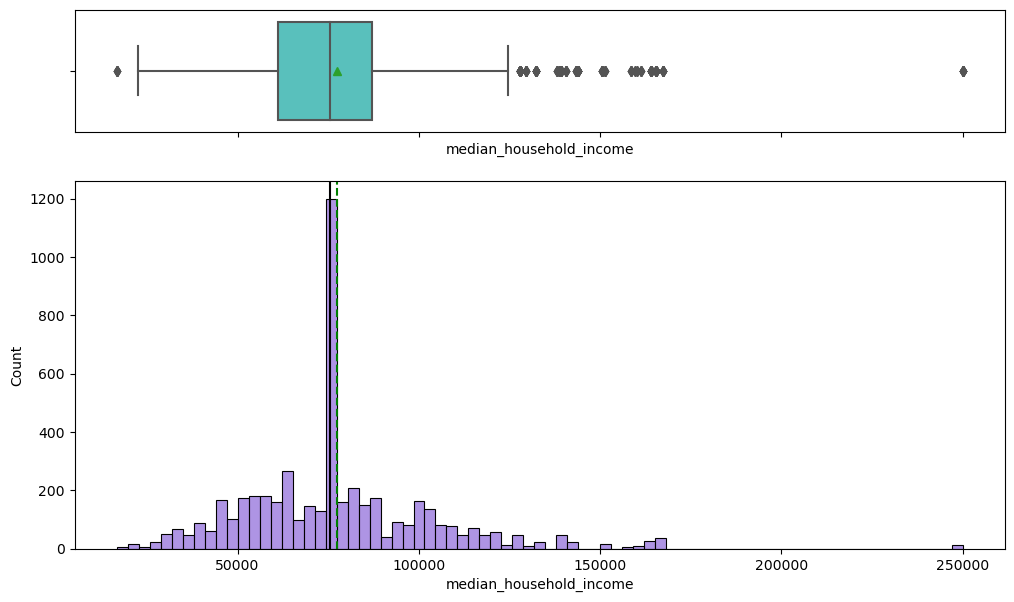

<IPython.core.display.Javascript object>

In [31]:
# Plot out the distribution
histogram_boxplot(customers, "median_household_income")

In [32]:
# There are definitely some outliers here
customers.loc[customers["median_household_income"] > 175000]

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
161    61          35      80    95053       2    2.8          1         0   
334    48          23      45    95053       1    1.3          2         0   
1518   43          17      64    95053       4    3.0          3       221   
1756   42          17      23    95053       2    0.0          3         0   
2398   53          29      90    95053       2    0.3          1       217   
2686   50          24      81    95053       2    0.4          3         0   
2997   57          33      80    95053       4    1.6          2         0   
3124   45          20     198    95053       2    2.8          1         0   
3458   48          23     191    95053       2    2.8          1       231   
3815   43          19      28    95053       4    0.3          1        96   
4062   38          14      43    95053       2    1.7          1         0   
4689   51          27      43    95053       4    1.1          2       164   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
161               0                   0           0       1           0   
334               0                   0           0       1           0   
1518              1                   0           0       1           0   
1756              0                   0           0       0           0   
2398              0                   1           0       0           1   
2686              0                   0           0       0           0   
2997              0                   0           0       0           0   
3124              0                   0           0       1           1   
3458              0                   0           0       0           1   
3815              0                   0           0       1           0   
4062              0                   0           0       1           0   
4689              0                   0           0       1           1   

      median_household_income              county  
161                  250001.0  Santa Clara County  
334                  250001.0  Santa Clara County  
1518                 250001.0  Santa Clara County  
1756                 250001.0  Santa Clara County  
2398                 250001.0  Santa Clara County  
2686                 250001.0  Santa Clara County  
2997                 250001.0  Santa Clara County  
3124                 250001.0  Santa Clara County  
3458                 250001.0  Santa Clara County  
3815                 250001.0  Santa Clara County  
4062                 250001.0  Santa Clara County  
4689                 250001.0  Santa Clara County

<IPython.core.display.Javascript object>

In [33]:
# where is this zipcode with the extremely large median household income?
zipcode = search.by_zipcode("95053")
print("95053", zipcode.major_city, zipcode.state)

95053 Santa Clara CA


<IPython.core.display.Javascript object>

Ok, that's probably valid, but it still may skew the model. Note there's only one customer in this zip code that opted for a personal loan in our last campaign. Maybe that's appropriate; in a more affluent area, customers may not need a personal loan.  We'll model it, and see what we get.

__Mortgage__

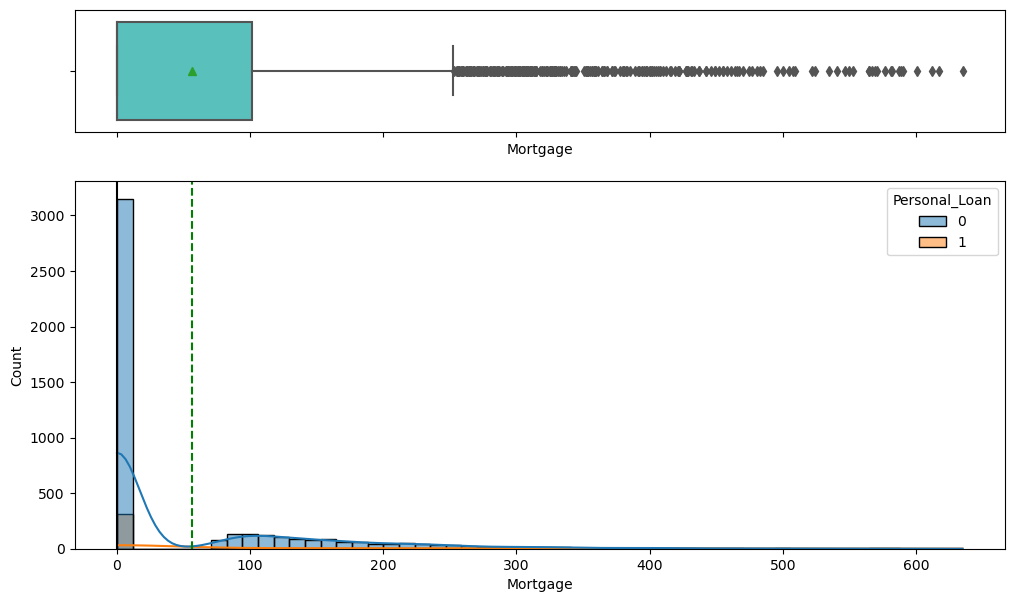

<IPython.core.display.Javascript object>

In [34]:
# Let's look at the skewed distribution
histogram_boxplot(customers, "Mortgage", kde=True, hue="Personal_Loan")

In [35]:
# We'll try a sqrt transformation, to handle the large number of zero values
customers["Mortgage_Sqrt"] = np.sqrt(customers["Mortgage"])

<IPython.core.display.Javascript object>

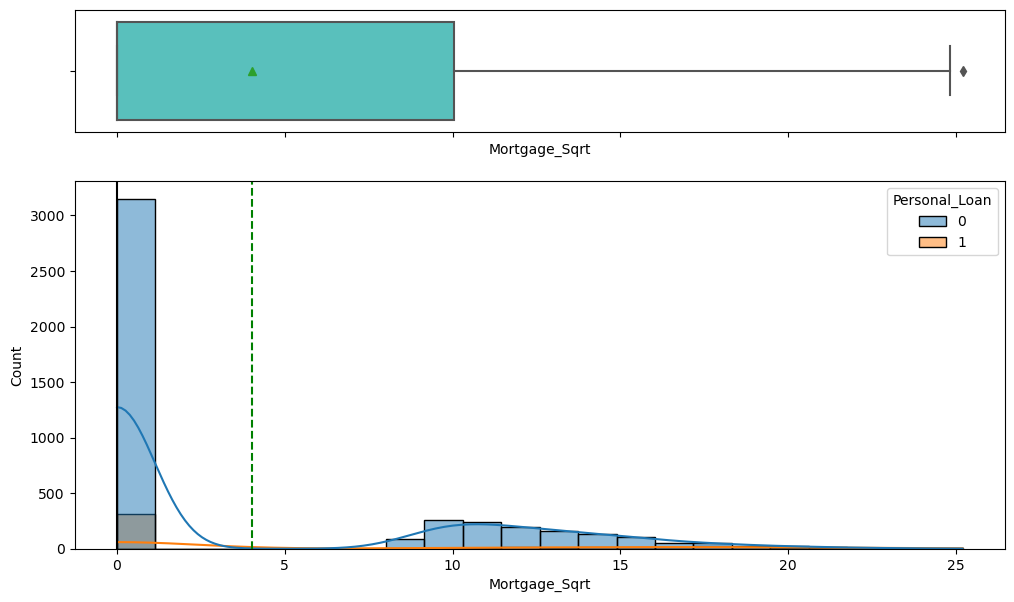

<IPython.core.display.Javascript object>

In [36]:
# Plot it once more
histogram_boxplot(customers, "Mortgage_Sqrt", kde=True, hue="Personal_Loan")

In [37]:
# drop the Mortgage column with the transformation complete
customers.drop("Mortgage", axis=1, inplace=True)

<IPython.core.display.Javascript object>

That's a little better distribution. Still heavily skewed, but perhaps more useful.

## Multivariate Analysis

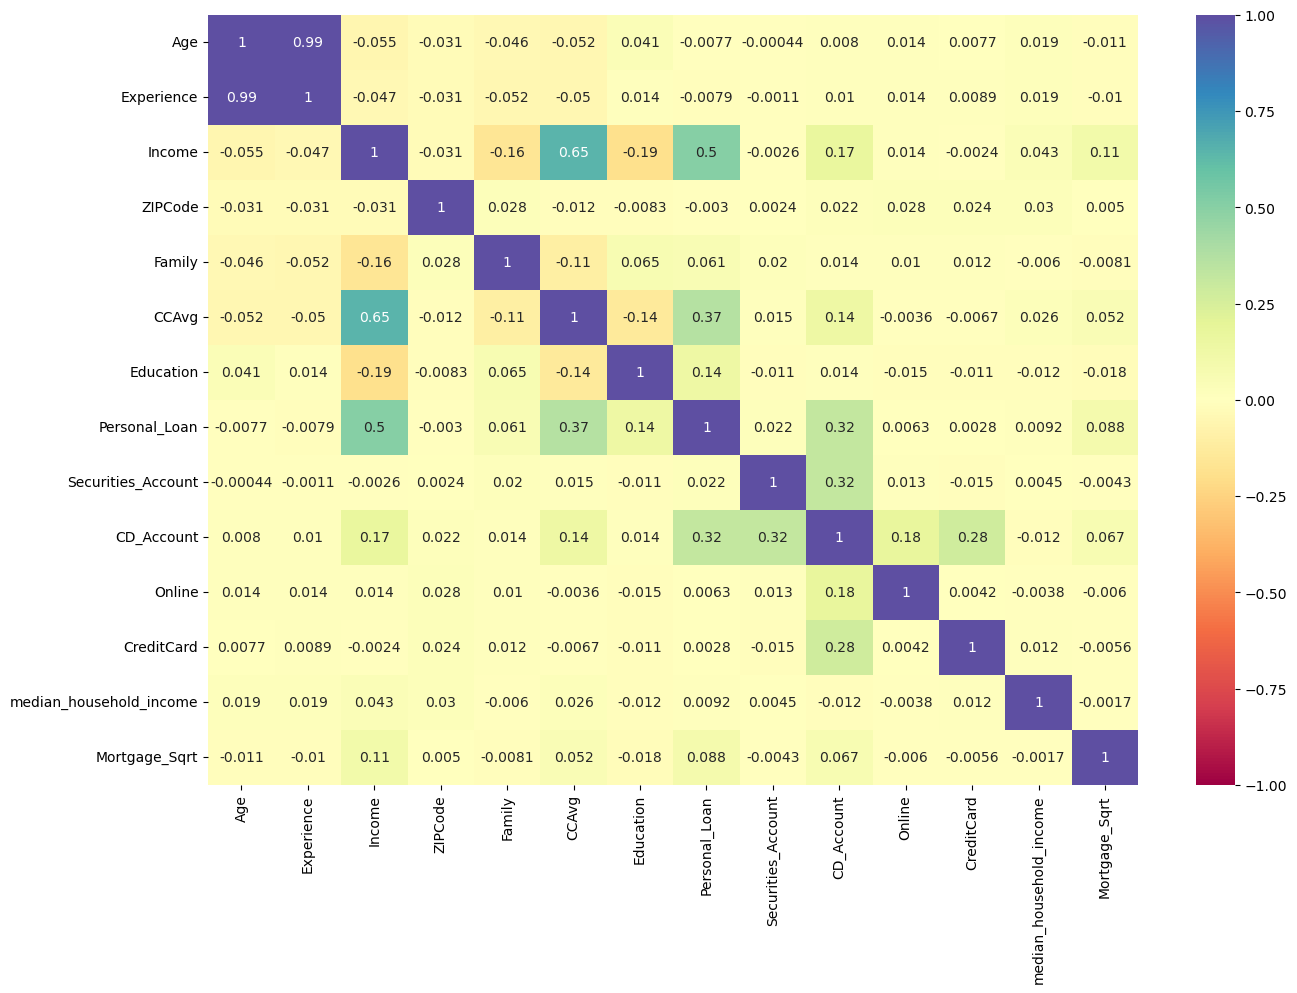

<IPython.core.display.Javascript object>

In [38]:
# The heatmap will give us a correlation matrix of our numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(customers.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

* The `median_household_income` didn't turn out to give us any strong correlations.
    * This initial observation caused me to take another look at the US Zip Code demographic data to retrieve additional data
    * A little experimentation showed all my ZIP codes in one state - California. That doesn't help target my campaign.
    * `county` is more useful, and gives me some insight for the business recommendations
* `Age` and `Experience` - experience is probably more directly useful
* `Personal_Loan` is correlated with `Income`,`CD_Account`, and `CCAvg` 

In [39]:
# enumerate a subset of our numeric values for our pairplot
numeric_vars = [
    "Age",
    "Experience",
    "Income",
    "Family",
    "CCAvg",
    "Mortgage_Sqrt",
    "median_household_income",
    "Personal_Loan",
]

<IPython.core.display.Javascript object>

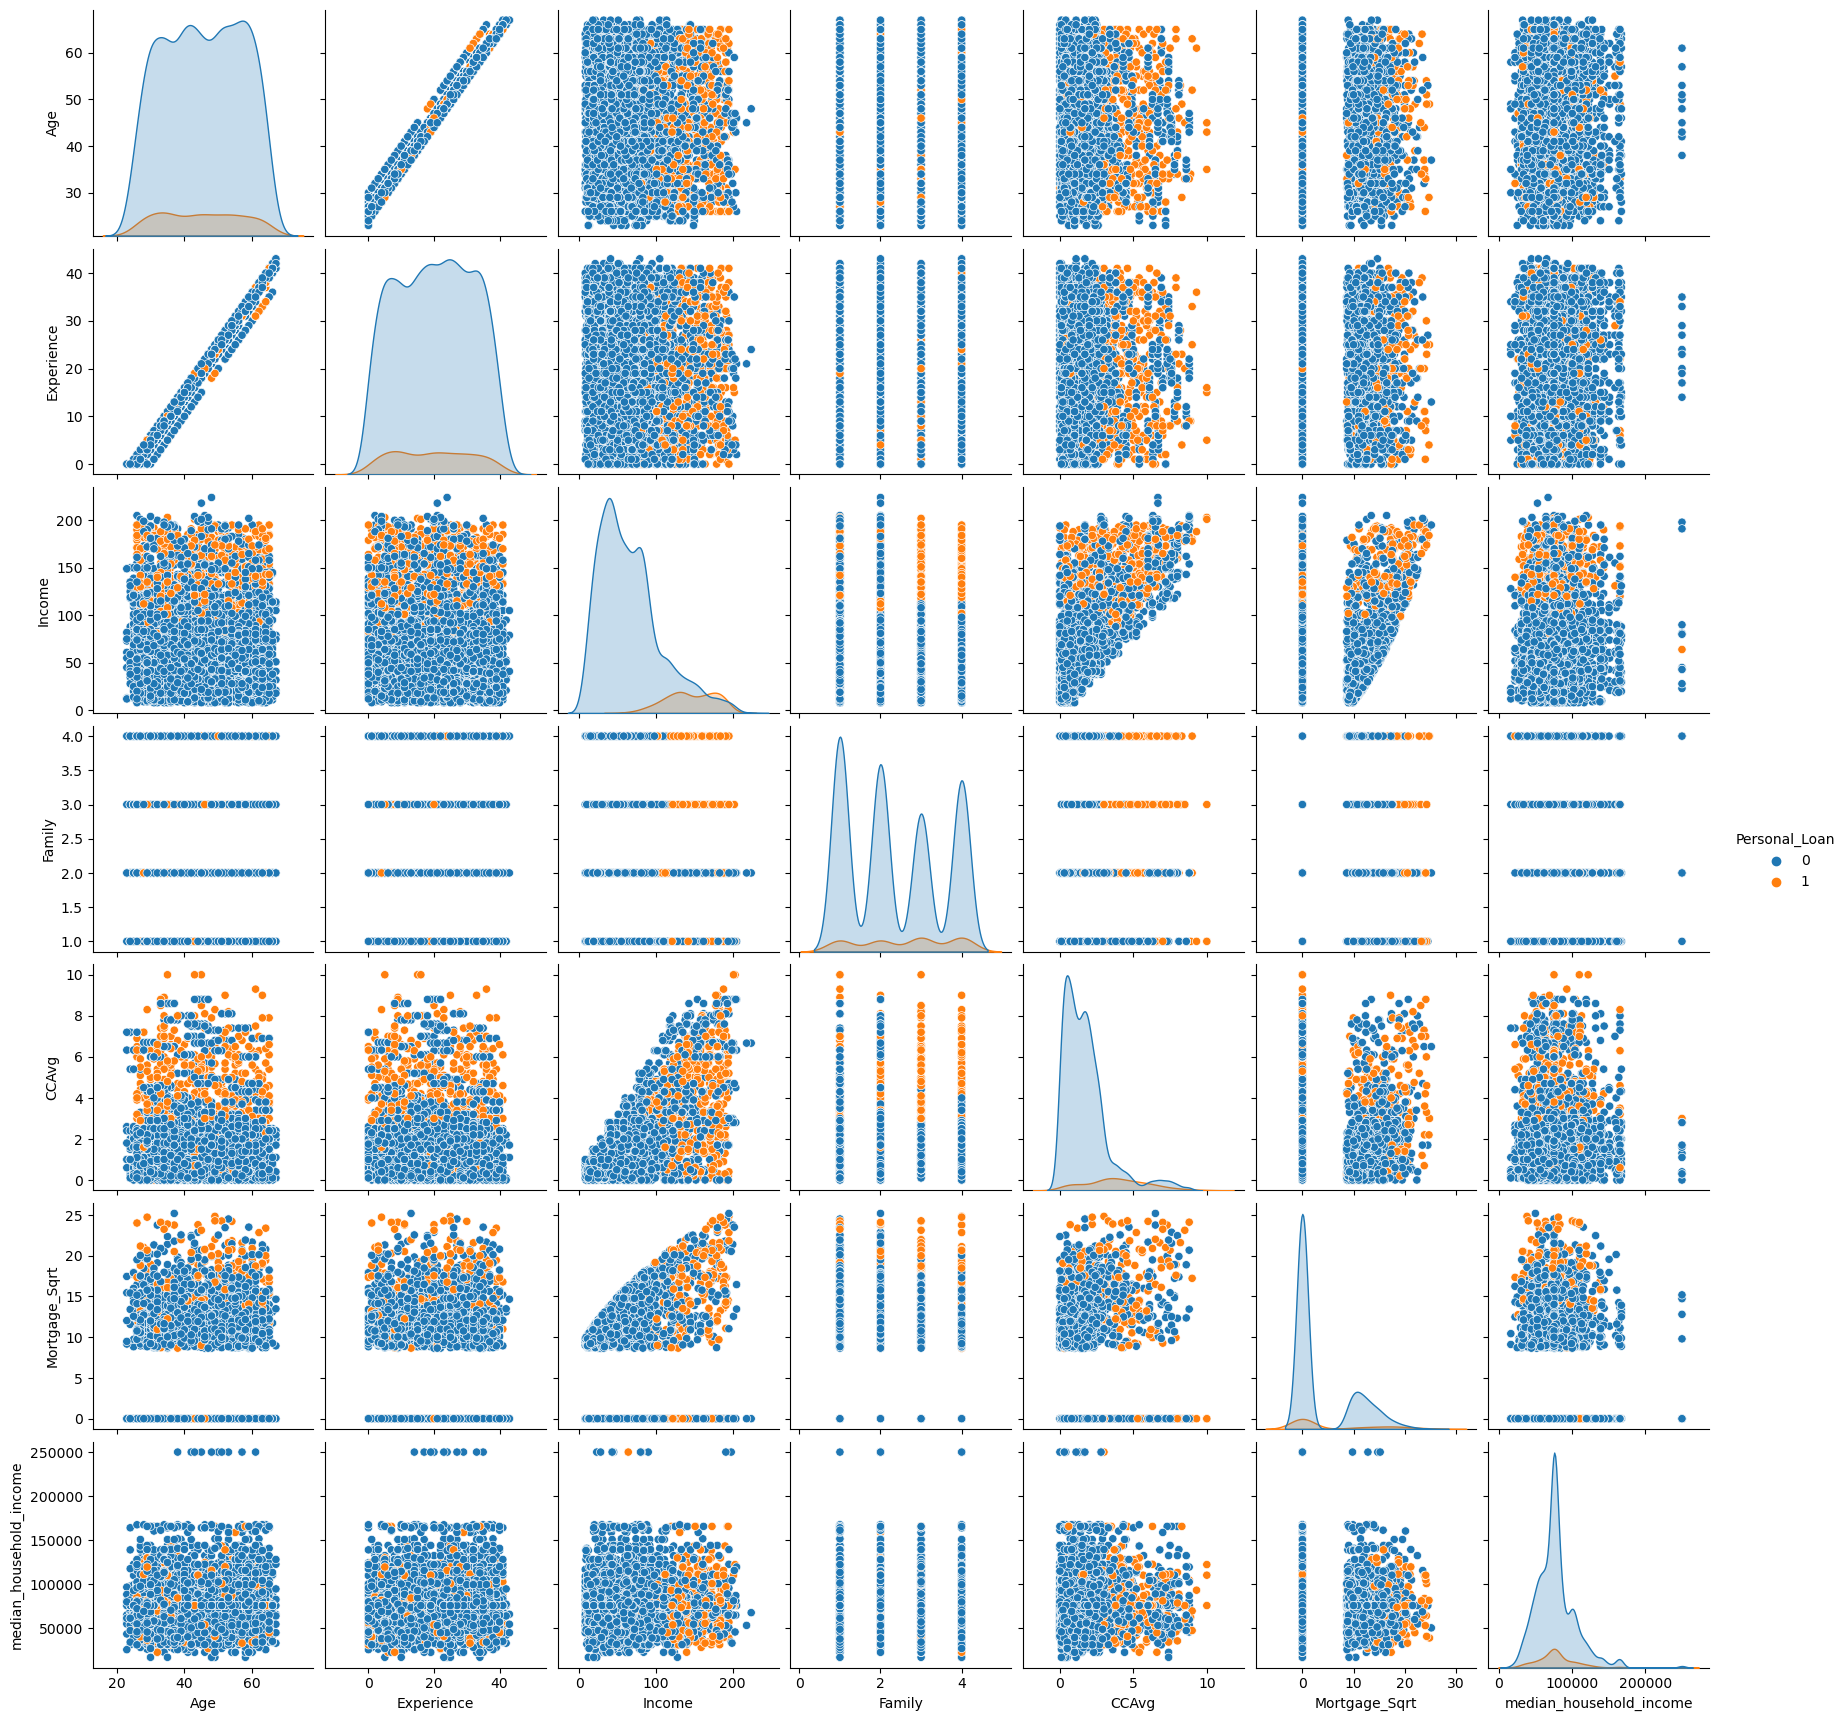

<IPython.core.display.Javascript object>

In [40]:
# Plot our numeric values against each other
sns.pairplot(data=customers[numeric_vars], hue="Personal_Loan", diag_kind="auto")

  * Customers taking out loans span all ages
  * In general, customers with larger incomes and more experience are more likely to take loans
  * Loan acceptance also correlates positively with both higher income, and credit card spending

This next visualization is to get a good sense of the ZIP codes with customers who have the largest Income, and the greatest participation in the previous personal loan campaign. Overlaying those two, we can get a good sense of where to focus our next campaign advertising.

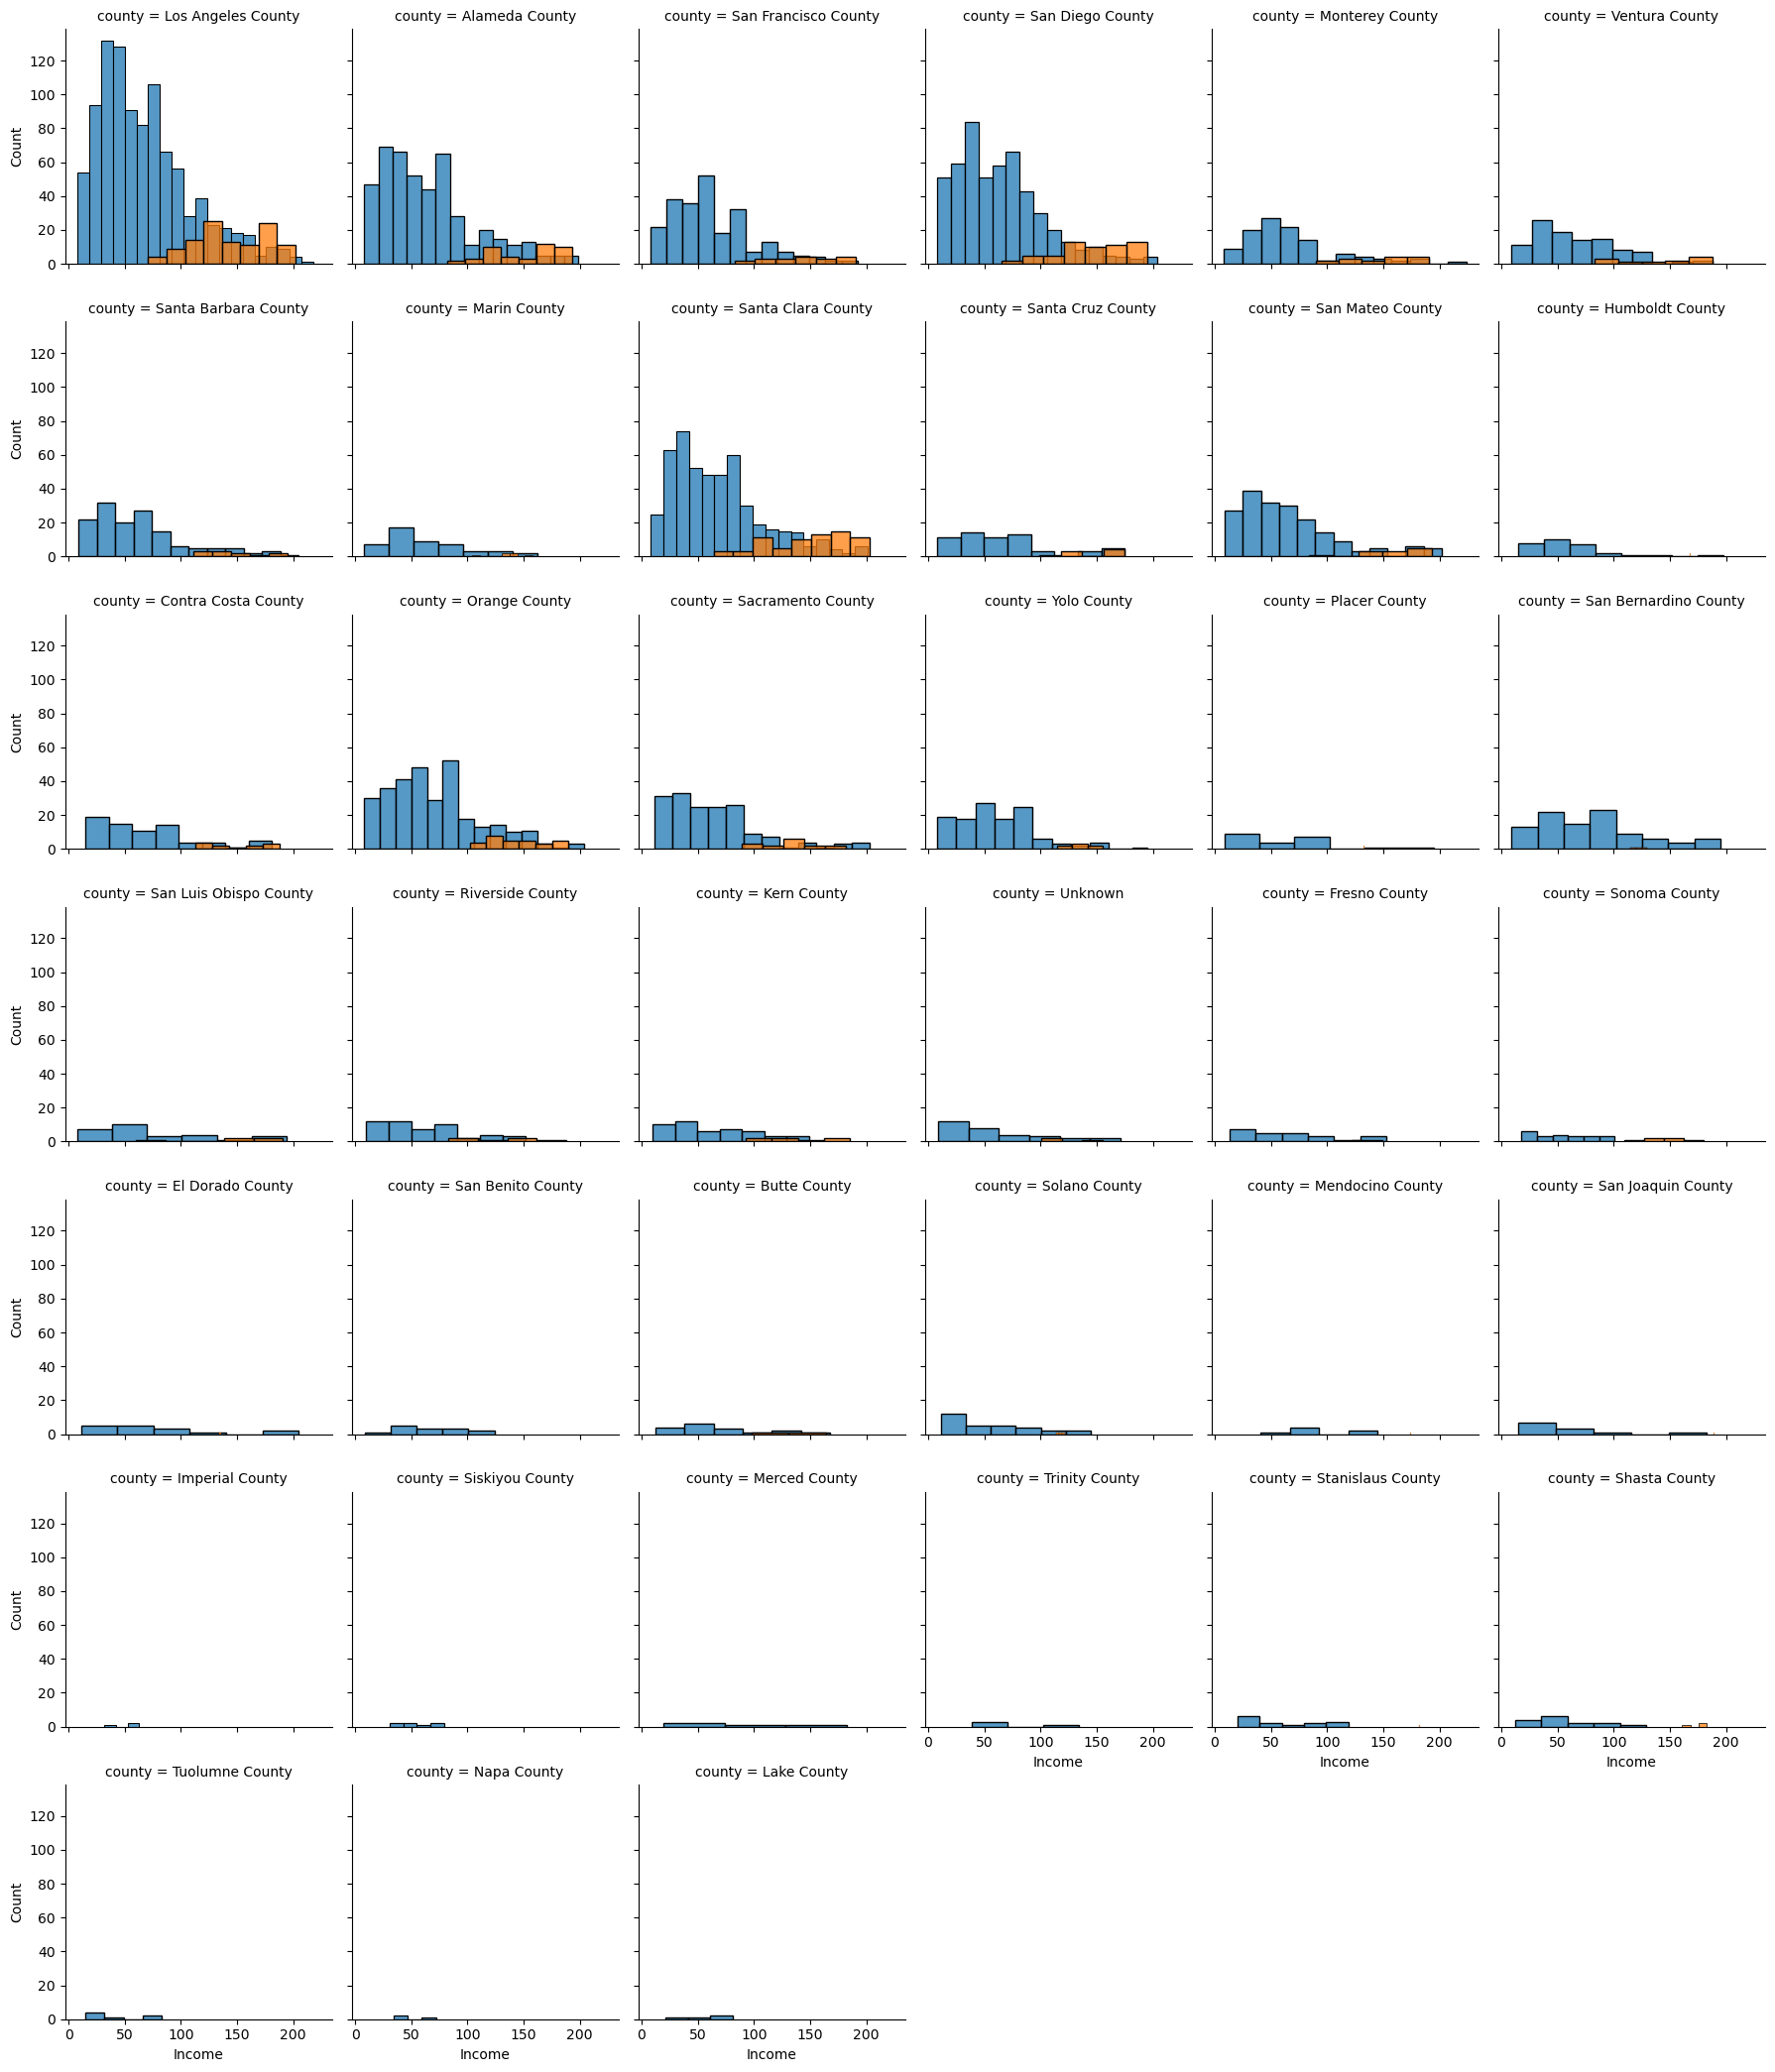

<IPython.core.display.Javascript object>

In [41]:
# build a grid six across with income and personal loan data by county
g = sns.FacetGrid(customers, col="county", hue="Personal_Loan", col_wrap=6)
g.map(sns.histplot, "Income")

### Observations
* __Summary__
    * As noted previously, the strongest correlations with customers who have previously taken out personal loans are `Income`, `CCAvg`, and `CD_Account`. There's some correlation with Education.
    * Coloring the pairplot with `Personal_Loan` information yielded a few insights
        * You can see positive correlation for `Personal_Loan` and `Age` & `Experience`
        * All ranges of `Age` and `Experience` with higher levels of income are more likely to have taken out a loan
        * Customers with higher incomes and higher credit card spending or higher mortgages are more likely to have taken out loans
        * Customers with higher incomes and living in zip codes with higher household income are more likely to have taken out loans
        * Customers with larger family sizes and higher incomes are more likely to have taken out loans
    * The last visualization is Income and Personal Loan participation broken down by County.  This gives us an idea about where to focus our campaign for best results

## Model Building - Classification

For this campaign, the bank prioritizes identifying all of the potential customers to target for loan offers. Our previous campaign produced a 9.6% result, so we're looking to improve on that.

__What are the consequences of predicting the wrong result?__
  * If we predict that a customer will not take out a loan, but they actually turned out to be a good candidate, we __lose the business__ by not offering it
  * If we predict that a customer is a good candidate to take out a loan, but they turn out not to want one - we __lose nothing__ by offering the loan
  
__What's the greater negative consequence?__
  * Failing to correctly identify all of the potential customers for our loan offer - we can lose valuable business
  
__We should optimize our model for recall__
  * This gives us the ratio of Predicted positives to Actual positives, so we'll minimize our false negatives

### Data Preparation

In [42]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Experience               5000 non-null   int64  
 2   Income                   5000 non-null   int64  
 3   ZIPCode                  5000 non-null   int64  
 4   Family                   5000 non-null   int64  
 5   CCAvg                    5000 non-null   float64
 6   Education                5000 non-null   int64  
 7   Personal_Loan            5000 non-null   int64  
 8   Securities_Account       5000 non-null   int64  
 9   CD_Account               5000 non-null   int64  
 10  Online                   5000 non-null   int64  
 11  CreditCard               5000 non-null   int64  
 12  median_household_income  5000 non-null   float64
 13  county                   5000 non-null   object 
 14  Mortgage_Sqrt           

<IPython.core.display.Javascript object>

In [43]:
# Copy off the full data set in case we need it later
customers_full = customers.copy()

<IPython.core.display.Javascript object>

In [44]:
# drop the county and ZipCode columns with our analysis completed
customers.drop("county", axis=1, inplace=True)
customers.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [45]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Experience               5000 non-null   int64  
 2   Income                   5000 non-null   int64  
 3   Family                   5000 non-null   int64  
 4   CCAvg                    5000 non-null   float64
 5   Education                5000 non-null   int64  
 6   Personal_Loan            5000 non-null   int64  
 7   Securities_Account       5000 non-null   int64  
 8   CD_Account               5000 non-null   int64  
 9   Online                   5000 non-null   int64  
 10  CreditCard               5000 non-null   int64  
 11  median_household_income  5000 non-null   float64
 12  Mortgage_Sqrt            5000 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

### Split the data into test and train datasets

In [46]:
# Personal_Loan is our dependent variable
X = customers.drop("Personal_Loan", axis=1)
y = customers.pop("Personal_Loan")

<IPython.core.display.Javascript object>

In [47]:
# Split the data 70/30 into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [48]:
# Did we get a good representative split of positive values?
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

We know our total positive rate was 9.6%, so this looks like a representative distribution.

__Our classes are skewed. We'll plan to use the hyperparameter for class-weights to automatically balance the weighting__

### Logistic Regression Methodology
We'll build the model, and examine the coefficients / odds for our independent variables. Next, we'll check our model performance and attempt to optimize by adjusting our threshold with an analysis of the AUC-ROC curve.

  * We'll identify the more significant attributes for prediction
  * We'll identify the best threshold value to optimize for __recall__

#### Useful Functions

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [50]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")

<IPython.core.display.Javascript object>

#### Build the logistic regression model

In [51]:
# We'll use the newton-cg solver for logistic regression, to better handle mult-collinearity
model = LogisticRegression(solver="newton-cg", class_weight="balanced", random_state=1)
# model = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=1)
lg = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [52]:
# Generate our coefficients
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Age  Experience    Income    Family    CCAvg  Education  \
coef -0.053594     0.04985  0.051718  0.576916  0.28234    1.28086   

      Securities_Account  CD_Account    Online  CreditCard  \
coef           -1.326664    3.630163 -0.505132   -1.013103   

      median_household_income  Mortgage_Sqrt  
coef                -0.000003       0.004093

<IPython.core.display.Javascript object>

__Coefficient Observations__
  * The positive coefficients include `CD_Account`, `Education`,`Family`, `Experience`, `CCAvg`, `Income`, and `Mortgage_Sqrt`. Increases in these will indicate a greater likelihood of accepting a personal loan.
  * The negative coefficients include `Age`, `Securities_Account`, `Online`, `Credit_Card`, and `median_household_income`. Increases in these will indicate a decrease in the likelihood the customer will accept a personal loan.

In [53]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience    Income     Family      CCAvg   Education  \
Odds         0.947817    1.051113  1.053079   1.780539   1.326229    3.599734   
Change_odd% -5.218329    5.111322  5.307862  78.053910  32.622902  259.973435   

             Securities_Account   CD_Account     Online  CreditCard  \
Odds                   0.265361    37.718961   0.603426    0.363091   
Change_odd%          -73.463889  3671.896111 -39.657406  -63.690935   

             median_household_income  Mortgage_Sqrt  
Odds                        0.999997       1.004101  
Change_odd%                -0.000307       0.410144

<IPython.core.display.Javascript object>

## __Odds Interpretations__
  * `Age`: All other factors constant, a unit change in age will decrease the likelihood of a customer accepting a personal loan by 5.2%
  * `Experience`: All other factors constant, a unit change in experience will increase the liklihood of a customer accepting a personal loan by 5.1%
  * `Income`: All other factors constant, a unit change in income will increase the liklihood of a customer accepting a personal loan by 5.3%
  * `Family`: All other factors constant, an additional family member will increase the liklihood of a customer accepting a personal loan by 78%
  * `CCAvg`: All other factors constant, a unit change in credit card average spending will increase the liklihood of a customer accepting a personal loan by 32.6%
  * `median_household_income`: Has a negligible impact on the liklihood a customer will accept a personal loan
  * `Mortgage_Sqrt`: All other factors constant, a unit change in Mortgage (sqrt) will increase the liklihood of a customer accepting a personal loan by 0.4%

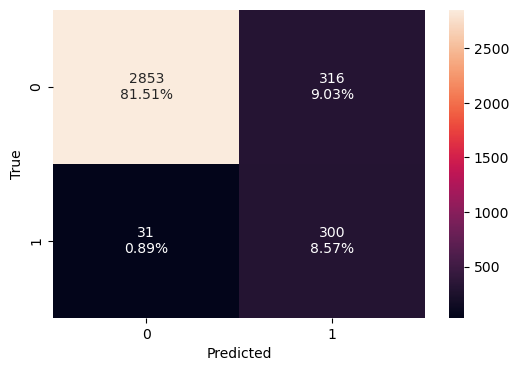

<IPython.core.display.Javascript object>

In [54]:
# creating the confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

Considering 9.6% *did* take the loan, this is not bad performance. Certainly not optimized for recall.

In [55]:
# Examine the training model performance
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.900857  0.906344   0.487013  0.63358

<IPython.core.display.Javascript object>

#### ROC-AUC Plot

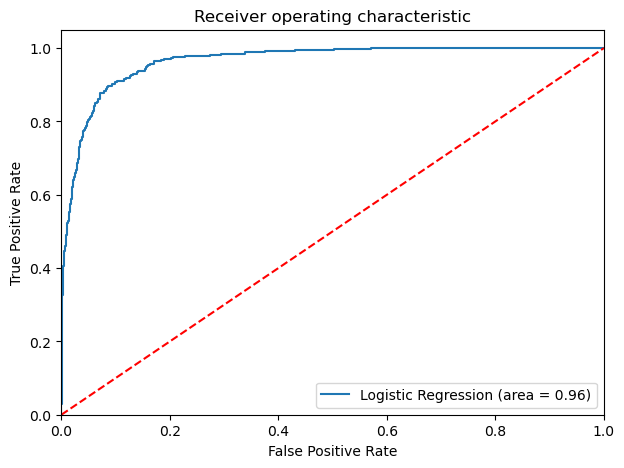

<IPython.core.display.Javascript object>

In [56]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Certainly good performance on the training set, but not optimized for recall.

In [57]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.5482713227480366


<IPython.core.display.Javascript object>

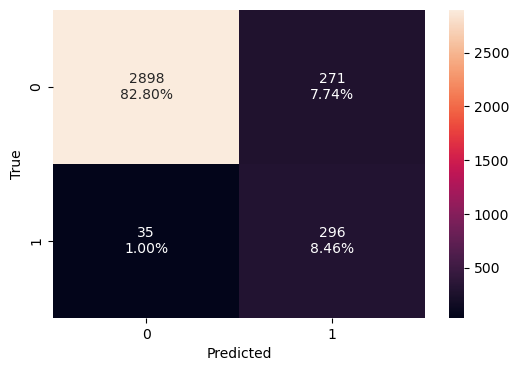

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix with the ROC-AUC optimal threshold
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [59]:
# checking model performance for this model with the training dataset
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy   Recall  Precision        F1
0  0.912571  0.89426   0.522046  0.659243

<IPython.core.display.Javascript object>

* __Precision and the F1 score are improved on the Training set__

__Let's try the Precision-Recall curve and test for a better threshold__

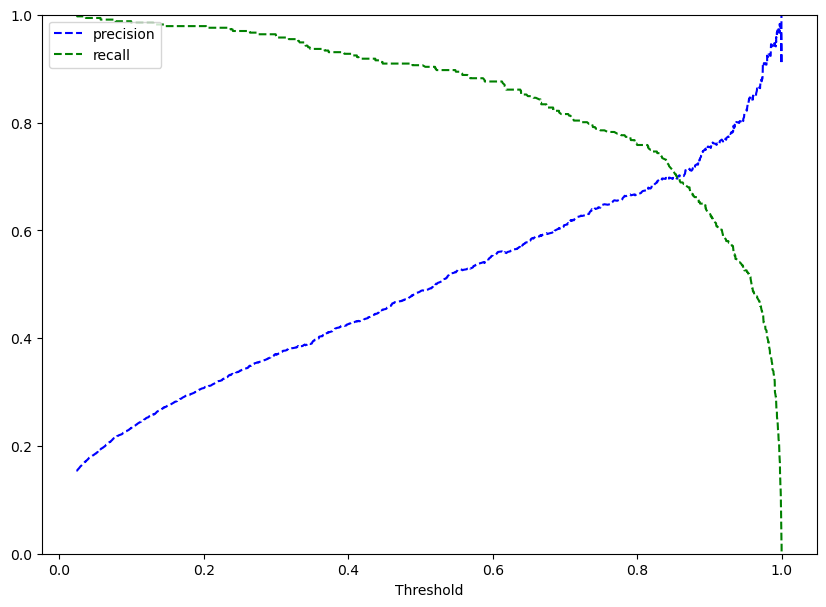

<IPython.core.display.Javascript object>

In [60]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

  * Looks like about a 0.9 threshold will give us equal precision and recall, but we want to optimize for recall
  * We'll back that off to about 0.5

In [61]:
# setting the threshold
optimal_threshold_curve = 0.50

<IPython.core.display.Javascript object>

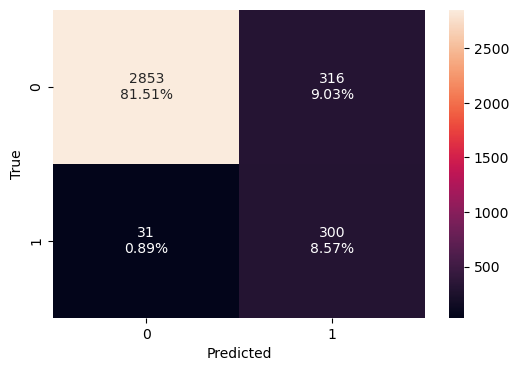

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [63]:
# checking model performance for this model with the training dataset
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.900857  0.906344   0.487013  0.63358

<IPython.core.display.Javascript object>

* Accuracy is slightly less than our original model, but better than the optimized model
* Recall is improved signicantly over the original model, at the cost of precision

#### Training Set - Performance Summary

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.55 Threshold",
    "Logistic Regression-0.50 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.55 Threshold  \
Accuracy                      0.900857                            0.912571   
Recall                        0.906344                            0.894260   
Precision                     0.487013                            0.522046   
F1                            0.633580                            0.659243   

           Logistic Regression-0.50 Threshold  
Accuracy                             0.900857  
Recall                               0.906344  
Precision                            0.487013  
F1                                   0.633580

<IPython.core.display.Javascript object>

#### Evaluate the Test dataset with these thresholds

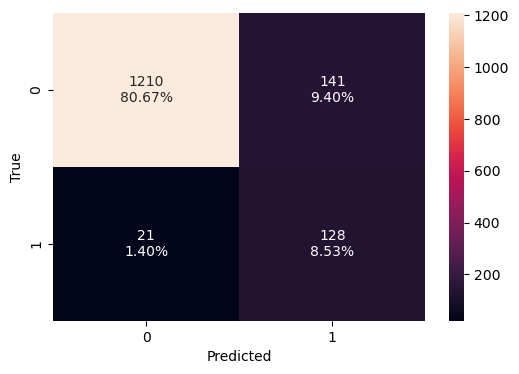

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [66]:
# checking model performance for this model with the test dataset
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy   Recall  Precision       F1
0     0.892  0.85906   0.475836  0.61244

<IPython.core.display.Javascript object>

* __Similar accuracy, but slightly worse performance with regard to recall from the training data__

#### ROC-AUC Plot

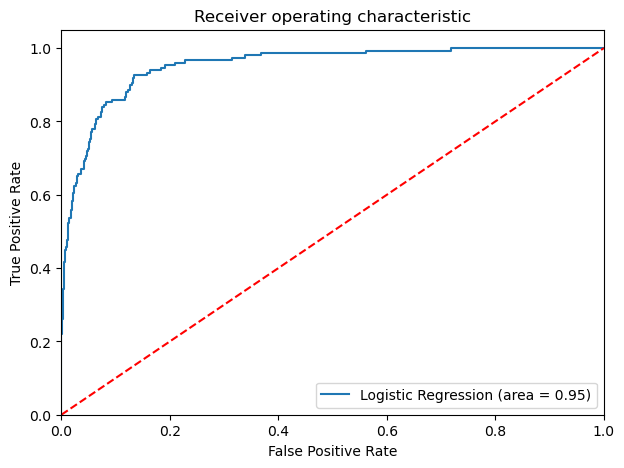

<IPython.core.display.Javascript object>

In [67]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

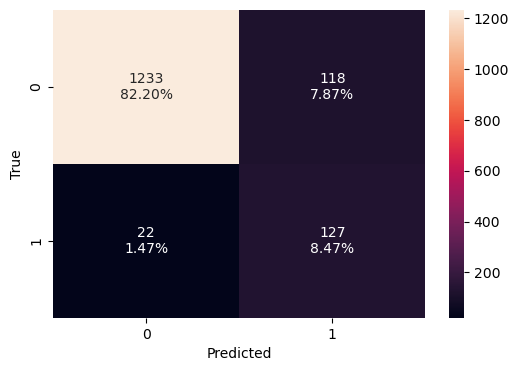

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [69]:
# checking model performance for this model with the test dataset
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision       F1
0  0.906667  0.852349   0.518367  0.64467

<IPython.core.display.Javascript object>

__Finally, the Precision-Recall curve and test for a better threshold__

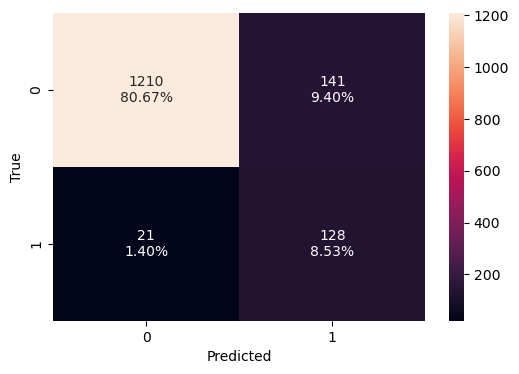

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [71]:
# checking model performance for this model with the test dataset
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy   Recall  Precision       F1
0     0.892  0.85906   0.475836  0.61244

<IPython.core.display.Javascript object>

#### Test Dataset - Performance Summary

In [72]:
# testing performance comparison with the test dataset

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.55 Threshold",
    "Logistic Regression-0.50 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.55 Threshold  \
Accuracy                      0.892000                            0.906667   
Recall                        0.859060                            0.852349   
Precision                     0.475836                            0.518367   
F1                            0.612440                            0.644670   

           Logistic Regression-0.50 Threshold  
Accuracy                             0.892000  
Recall                               0.859060  
Precision                            0.475836  
F1                                   0.612440

<IPython.core.display.Javascript object>

#### Logistic Regression Conclusions
  * Exploring different thresholds and optimizing for recall gave us significantly better results in model performance
  * __Best Performance, and the recommended model for Logistic Regression is with the 0.55 threshold (AUC-ROC model)__
  * The cost of lower precision for this application is less than the cost of reduced recall
  * Optimizing for recall still delivered an accuracy > 90%, and a similar F1 score with an 85% recall

### Decision Tree Methodology
We'll take several approaches here to our model, and build them and test them individually. We'll close by comparing the results of each approach, and recommending a model for our campaign.  We'll also include business recommendations to help tailor the campaign.

__Models__
  * Initial, unrestricted decision tree with a gini classifier criterion
  * Pre-pruned, limited depth decision tree
  * Hyperparameter tuning with a variety of values
  * Post-pruned cost-complexity decision tree model
  
We'll visualize each of these options to understand the shape of the model.

#### Useful Functions

In [73]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [74]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

    # Add a return here so that we can parameterize this for each model
    return (
        metrics.recall_score(y_train, pred_train),
        metrics.recall_score(y_test, pred_test),
    )

<IPython.core.display.Javascript object>

### Full Decision Tree

In [75]:
%%time
# generate our full decision tree
dTree = DecisionTreeClassifier(criterion="gini", class_weight="balanced", random_state=1)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

Wall time: 7.01 ms


<IPython.core.display.Javascript object>

In [76]:
# What's the accuracy for the test and training data
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9733333333333334


<IPython.core.display.Javascript object>

In [77]:
# Checking number of positives
y.sum(axis=0)

480

<IPython.core.display.Javascript object>

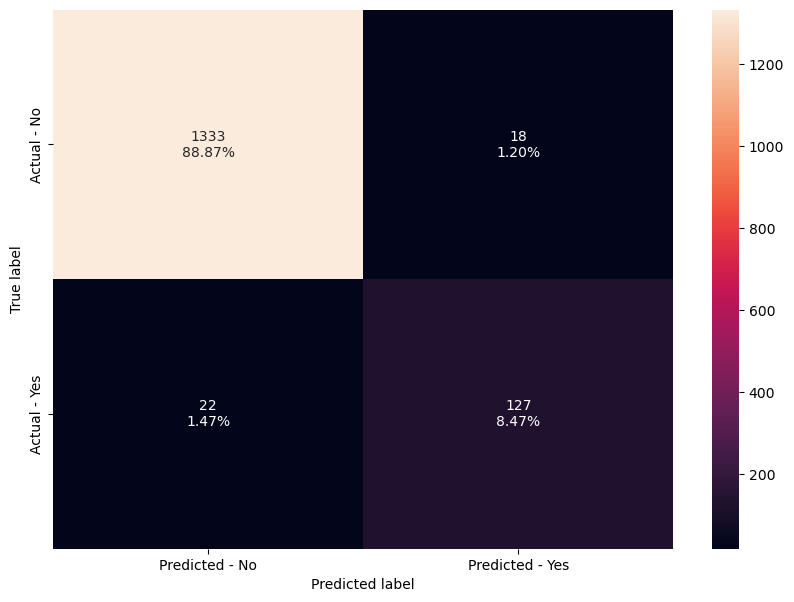

<IPython.core.display.Javascript object>

In [78]:
# Plot the confusion matrix
make_confusion_matrix(dTree, y_test)

In [79]:
# Recall on train and test
recalls_full = get_recall_score(dTree)
recall_train_full = recalls_full[0]
recall_test_full = recalls_full[1]

Recall on training set :  1.0
Recall on test set :  0.8523489932885906


<IPython.core.display.Javascript object>

In [80]:
# Get our list of independent features
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'median_household_income', 'Mortgage_Sqrt']


<IPython.core.display.Javascript object>

__Visualize the full decision tree__

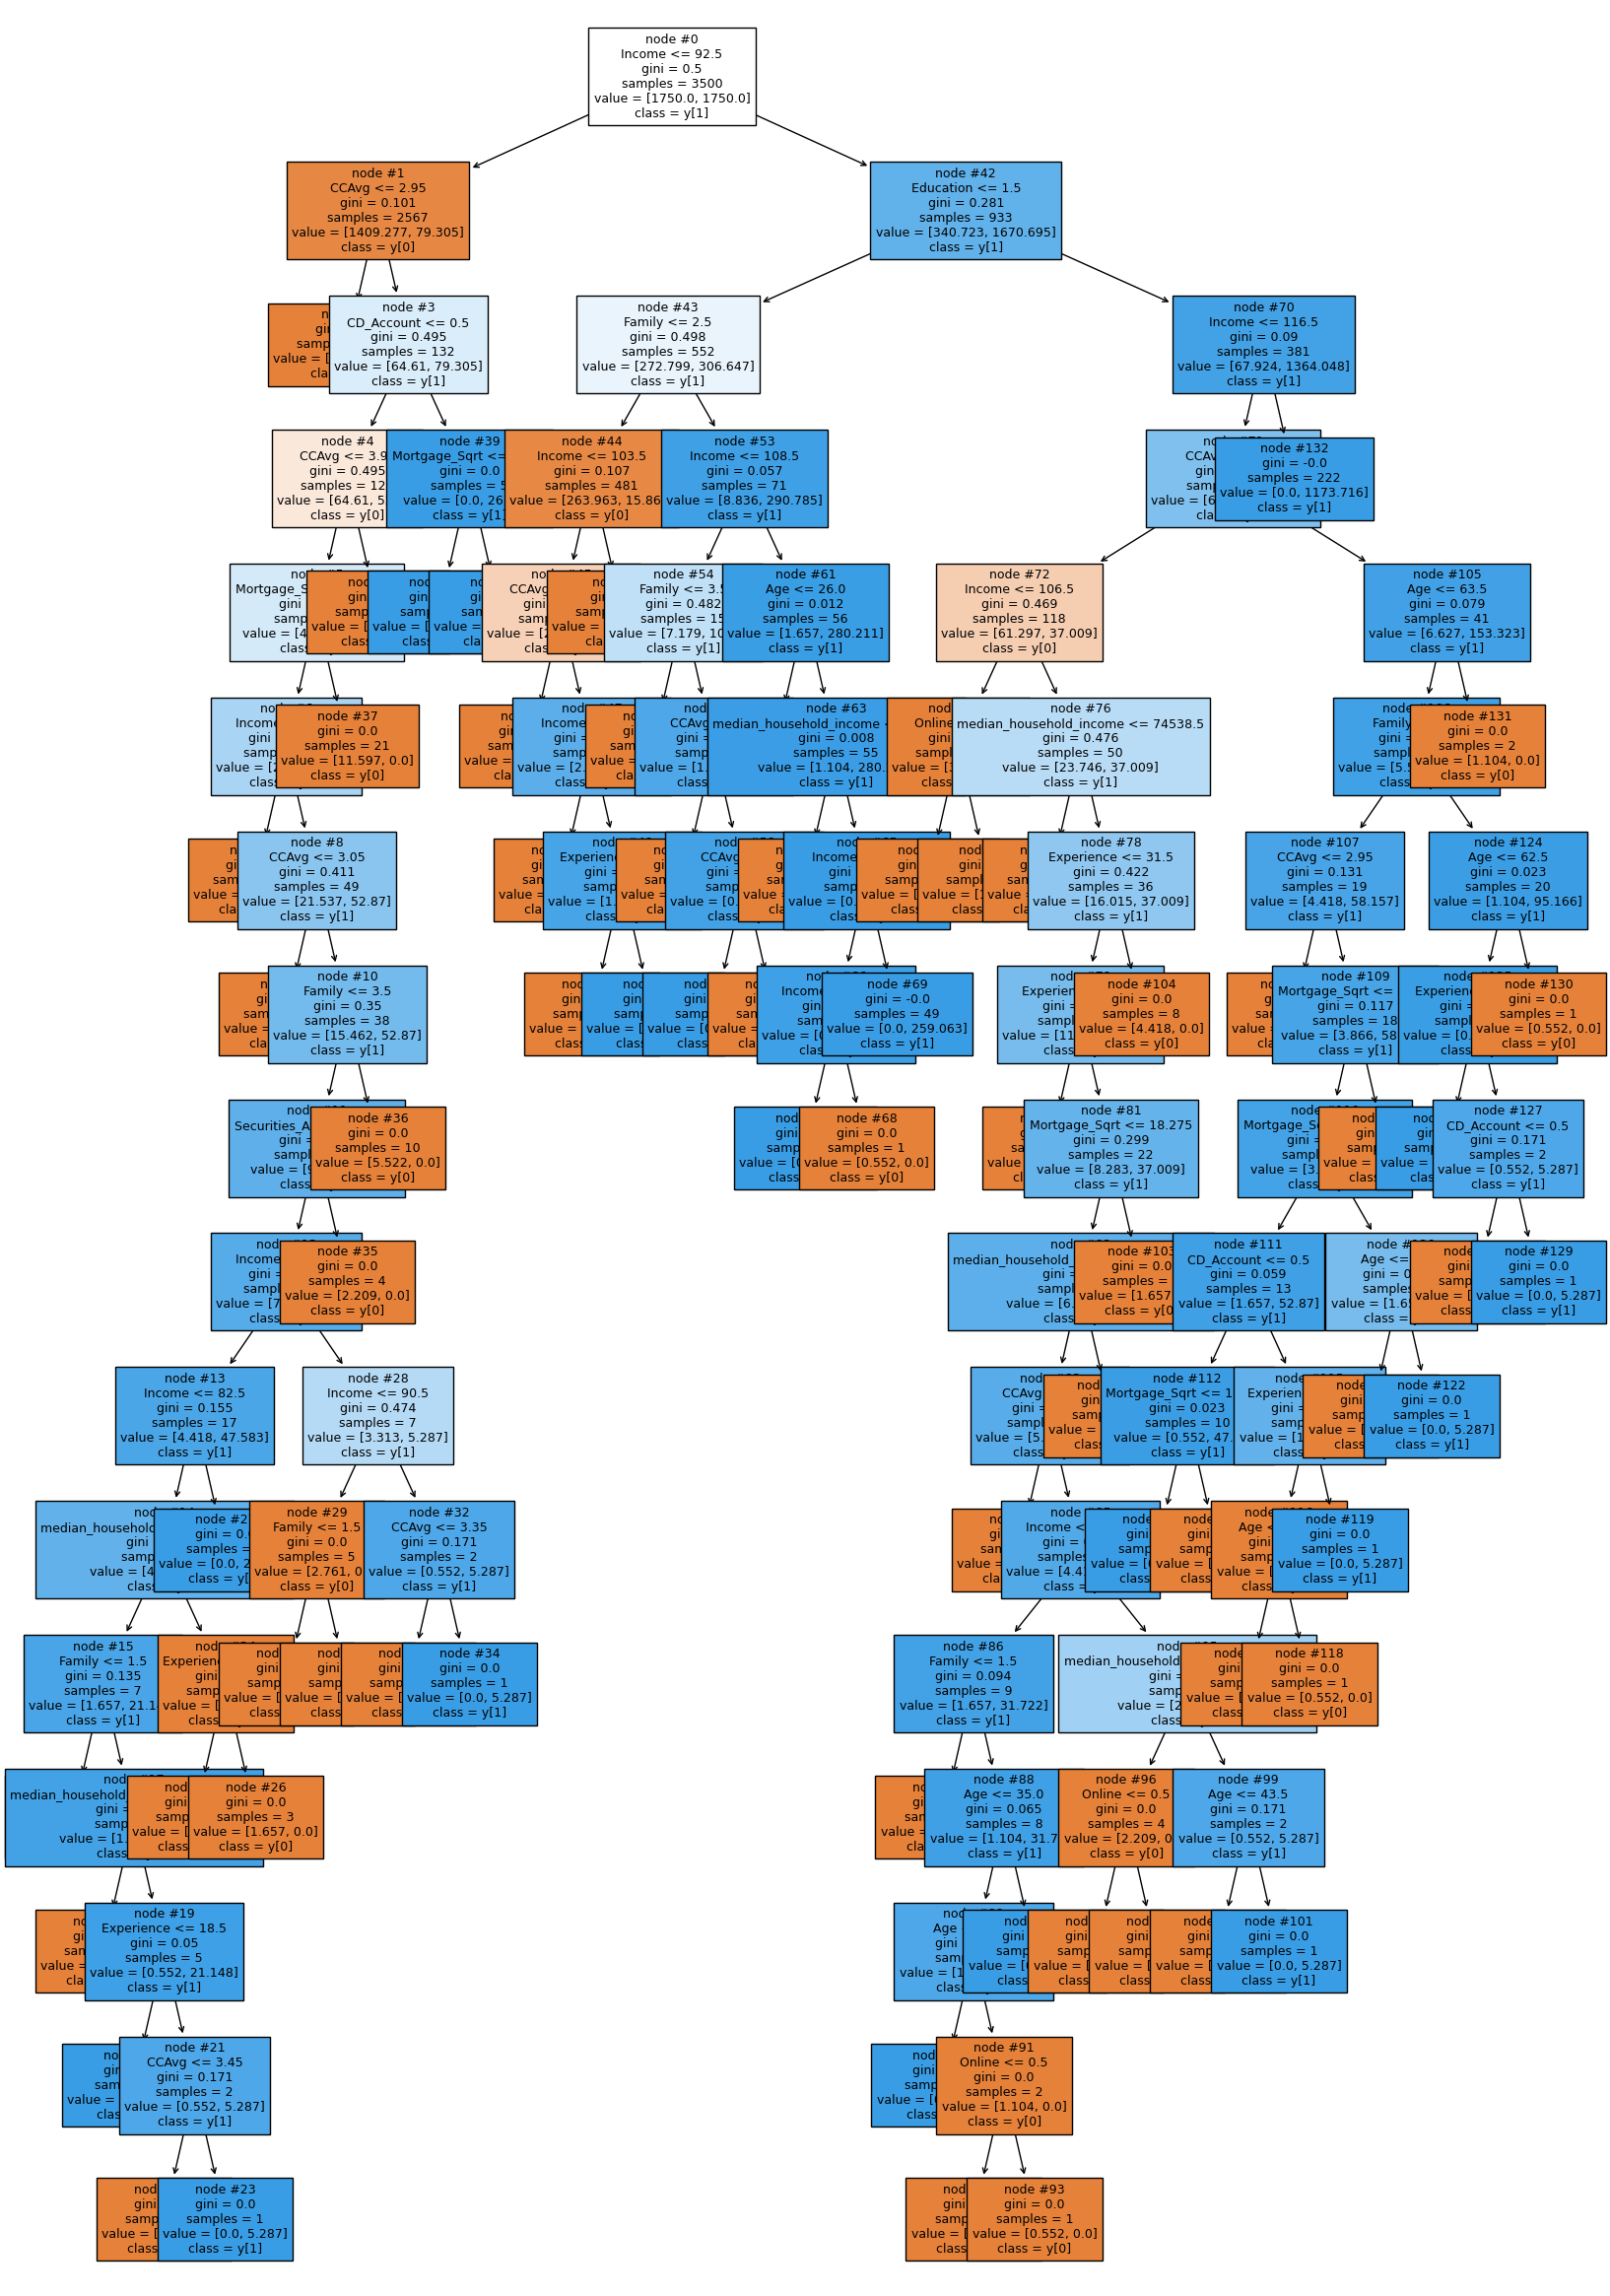

<IPython.core.display.Javascript object>

In [81]:
# Visualize the full decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [82]:
# Text report showing the rules of the full decision tree
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage_Sqrt <= 10.12
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   |   |   |   |   |-

<IPython.core.display.Javascript object>

In [83]:
# List the Gini importance of our features, in order
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Income                   6.364376e-01
Family                   1.472330e-01
CCAvg                    9.139323e-02
Education                8.449977e-02
median_household_income  9.822335e-03
CD_Account               8.198637e-03
Mortgage_Sqrt            7.552647e-03
Experience               7.362990e-03
Age                      5.645890e-03
Securities_Account       1.853859e-03
Online                   8.618330e-18
CreditCard               0.000000e+00


<IPython.core.display.Javascript object>

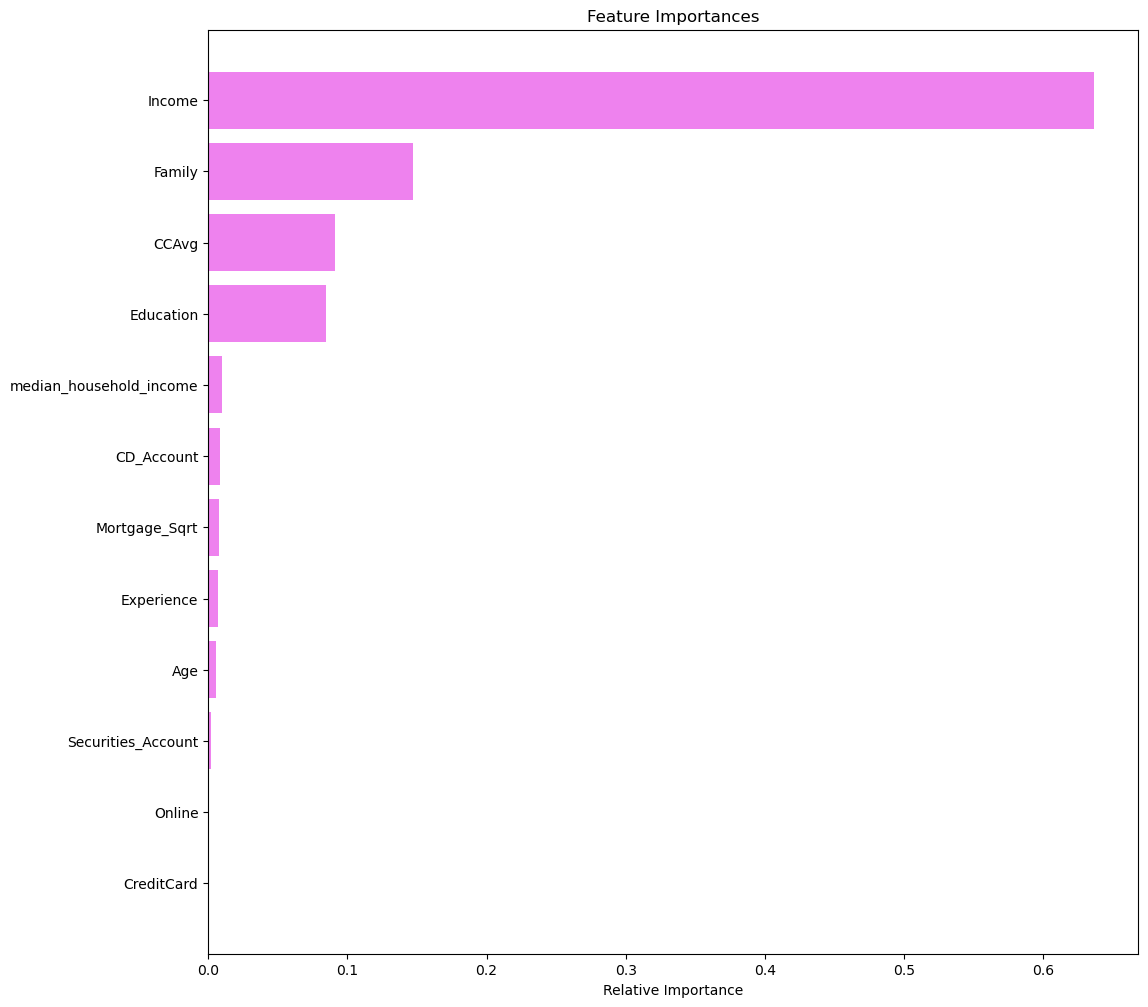

<IPython.core.display.Javascript object>

In [84]:
# Visualize the Gini importances of our features
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
  * This full decision tree model suggests that Education is the most important variable for taking out a personal loan
  * It's a very complex model, that fits the training data perfectly

### Pre-prune our tree, limiting depth
*Let's try limiting the depth to 4*

In [85]:
%%time
# generate our pre-pruned tree
dTree1 = DecisionTreeClassifier(criterion="gini", class_weight="balanced", max_depth=4, random_state=1)
dTree1.fit(X_train, y_train)

Wall time: 5 ms


DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

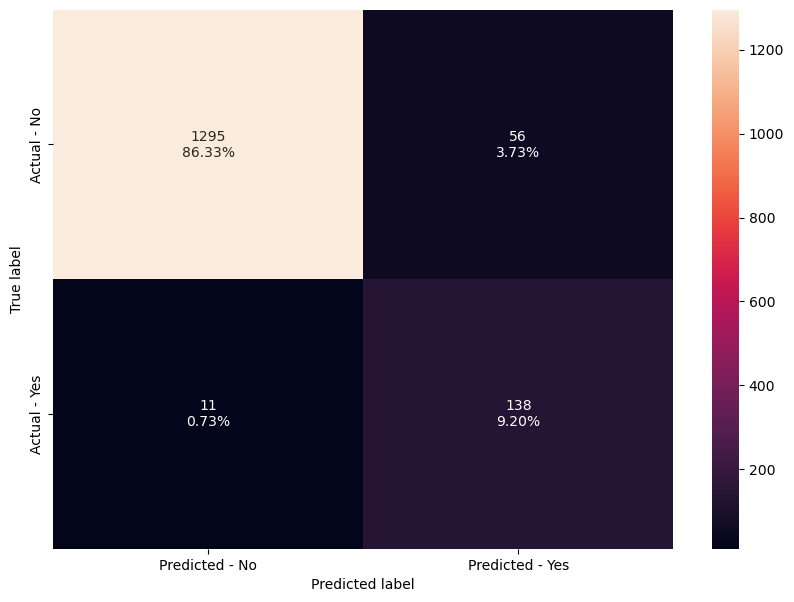

<IPython.core.display.Javascript object>

In [86]:
# Generate our confusion matrix for our pre-pruned model
make_confusion_matrix(dTree1, y_test)

In [87]:
# Accuracy on train and test
print("Accuracy on training set : ", dTree1.score(X_train, y_train))
print("Accuracy on test set : ", dTree1.score(X_test, y_test))

Accuracy on training set :  0.9677142857142857
Accuracy on test set :  0.9553333333333334


<IPython.core.display.Javascript object>

In [88]:
# Recall on train and test
recalls_pre_prune = get_recall_score(dTree1)
recall_train_pre_prune = recalls_pre_prune[0]
recall_test_pre_prune = recalls_pre_prune[1]

Recall on training set :  0.9697885196374623
Recall on test set :  0.9261744966442953


<IPython.core.display.Javascript object>

  * Recall is reduced now for our training data from "perfect", to 96%  - improved, and still a respectable value for the test dataset, as well
  * Accuracy remains high for both training and test data

__Visualize the pre-pruned decision tree (depth=4)__

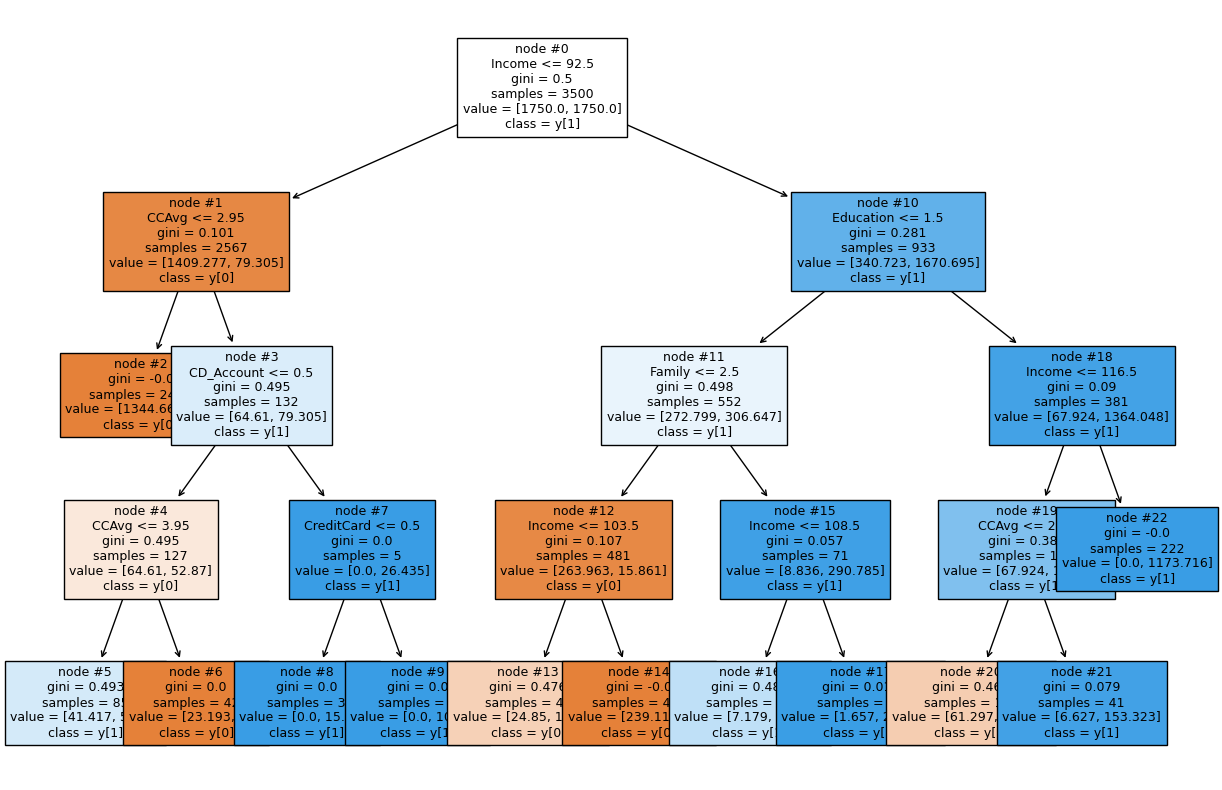

<IPython.core.display.Javascript object>

In [89]:
# Visualize the pre-pruned decision tree
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [90]:
# Text report showing the rules of the pre-pruned decision tree
print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CreditCard <= 0.50
|   |   |   |   |--- weights: [0.00, 15.86] class: 1
|   |   |   |--- CreditCard >  0.50
|   |   |   |   |--- weights: [0.00, 10.57] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [24.85, 15.86] class: 0
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- weights: [7.18, 10.57] class: 1
|   |   |   |--- Income >  108.50
|   |   |   |   |--- weights: [1.66, 280.21] class: 1
|   |--- Education >

<IPython.core.display.Javascript object>

In [91]:
# List the Gini importance of our features, in order
print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Income                   6.687246e-01
Family                   1.497751e-01
Education                9.164912e-02
CCAvg                    8.176065e-02
CD_Account               8.090501e-03
CreditCard               2.728452e-17
Age                      0.000000e+00
Experience               0.000000e+00
Securities_Account       0.000000e+00
Online                   0.000000e+00
median_household_income  0.000000e+00
Mortgage_Sqrt            0.000000e+00


<IPython.core.display.Javascript object>

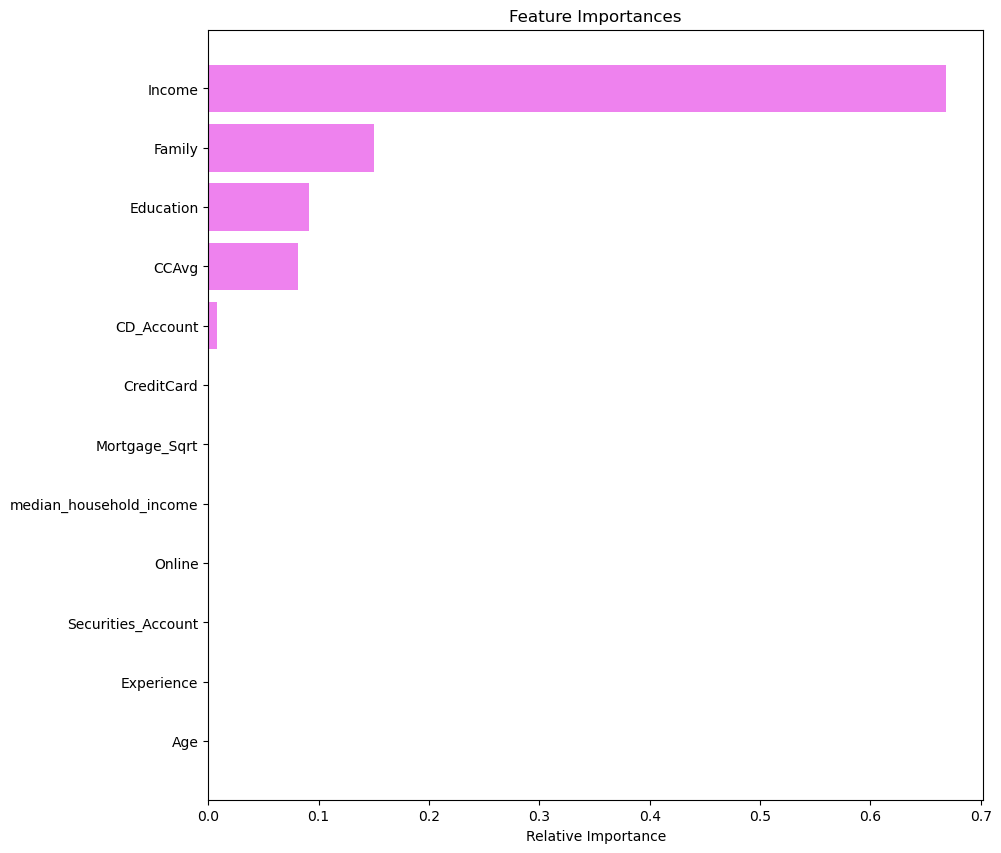

<IPython.core.display.Javascript object>

In [92]:
# Visualize the Gini importances of our features
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
  * For this model, we got a similar set of variables ranked by importance
  * This seems like a reasonable depth to pre-prune, given the limited number of variables

### Grid search to perform hyperparameter tuning 

In [93]:
%%time
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(4, 11), # With some experimentation, I set the minimum depth at 4
    "min_samples_leaf": [10, 15, 20, 30,50],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001,0.01, 0.1],
    "class_weight": [{0:0.5, 1:0.5},"balanced"] # test balanced, and equal class weighting
}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.recall_score)
scoring = {'recall': metrics.make_scorer(metrics.recall_score),
           'f1': metrics.make_scorer(metrics.f1_score),
           'accuracy': metrics.make_scorer(metrics.accuracy_score)}

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scoring, refit = 'recall', cv=10, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

Wall time: 1min 5s


DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

<IPython.core.display.Javascript object>

__Letting the estimator through all depths, it would consistently overfit with poor accuracy at 3 levels deep. That was unuseable, and the pre-pruned model at 4 deep already showed the best results.  I retuned the estimator, but this time set the minimum depth at 4, and let it experiment with all other parameters, refitting for recall.__

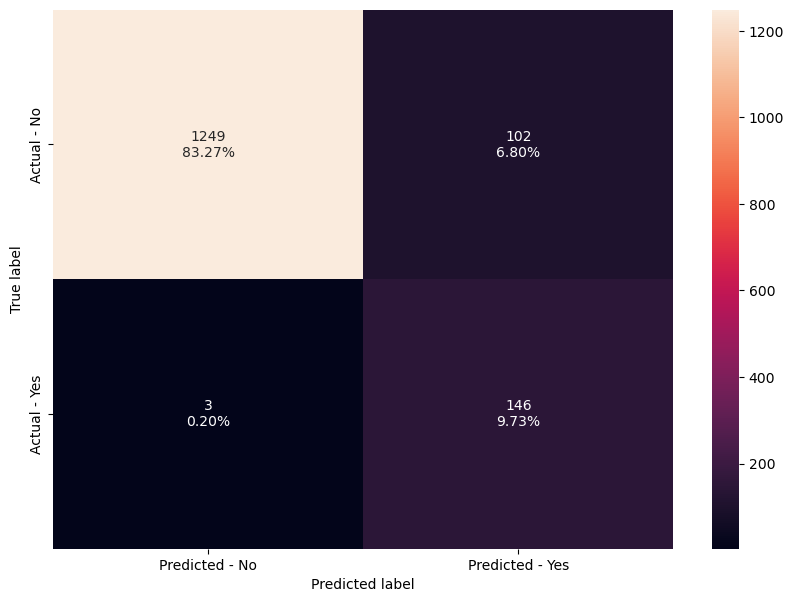

<IPython.core.display.Javascript object>

In [94]:
# Generate our confusion matrix for our grid-search model
make_confusion_matrix(estimator, y_test)

In [95]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))

Accuracy on training set :  0.926
Accuracy on test set :  0.93


<IPython.core.display.Javascript object>

In [96]:
# Recall on train and test
recalls_hyper = get_recall_score(estimator)
recall_train_hyper = recalls_hyper[0]
recall_test_hyper = recalls_hyper[1]

Recall on training set :  0.9909365558912386
Recall on test set :  0.9798657718120806


<IPython.core.display.Javascript object>

  * __With the additional tuning of setting the minimum depth at 4, we get excellent accuracy with high recall__
  
  __Let's take a closer look at the scoring__

In [97]:
# Scoring by class
y_pred = estimator.predict(X_test)
estimator_report = classification_report(y_test, y_pred)
print(estimator_report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1351
           1       0.59      0.98      0.74       149

    accuracy                           0.93      1500
   macro avg       0.79      0.95      0.85      1500
weighted avg       0.96      0.93      0.94      1500



<IPython.core.display.Javascript object>

__Retrieve a detailed set of metrics from the GridSearch, and examine the spread between train and test__

In [98]:
# Define a subset of the GridSearch results we're interested in.
cols = [
    "params",
    "param_max_depth",
    "param_min_impurity_decrease",
    "param_min_samples_leaf",
    "mean_test_recall",
    "mean_train_recall",
    "rank_test_recall",
    "mean_test_accuracy",
]

# Using this list, we'll create a data frame and sort it
grid_obj_df = (
    pd.DataFrame(grid_obj.cv_results_)
    .loc[:, cols]
    .sort_values(by="mean_test_recall", ascending=False)
)

# Calculate the difference between the recall values for the train and test data
grid_obj_df["train-test"] = (
    grid_obj_df["mean_train_recall"] - grid_obj_df["mean_test_recall"]
)

<IPython.core.display.Javascript object>

__Quick look at the results where we have a narrow spread in Recall between train and test data__

In [99]:
# Let's look at results where the difference is fairly narrow
grid_obj_df.loc[grid_obj_df["train-test"] < 0.15].head(3)

params param_max_depth  \
631  {'class_weight': 'balanced', 'max_depth': 7, '...               7   
510  {'class_weight': 'balanced', 'max_depth': 5, '...               5   
699  {'class_weight': 'balanced', 'max_depth': 8, '...               8   

    param_min_impurity_decrease param_min_samples_leaf  mean_test_recall  \
631                       0.001                     15          0.987879   
510                       0.001                     10          0.987879   
699                        0.01                     50          0.987879   

     mean_train_recall  rank_test_recall  mean_test_accuracy  train-test  
631           0.990936                 1            0.926571    0.003057  
510           0.990936                 1            0.926571    0.003057  
699           0.990936                 1            0.926571    0.003057

<IPython.core.display.Javascript object>

__Visualize the grid-search decision tree (optimized hyperparameters)__

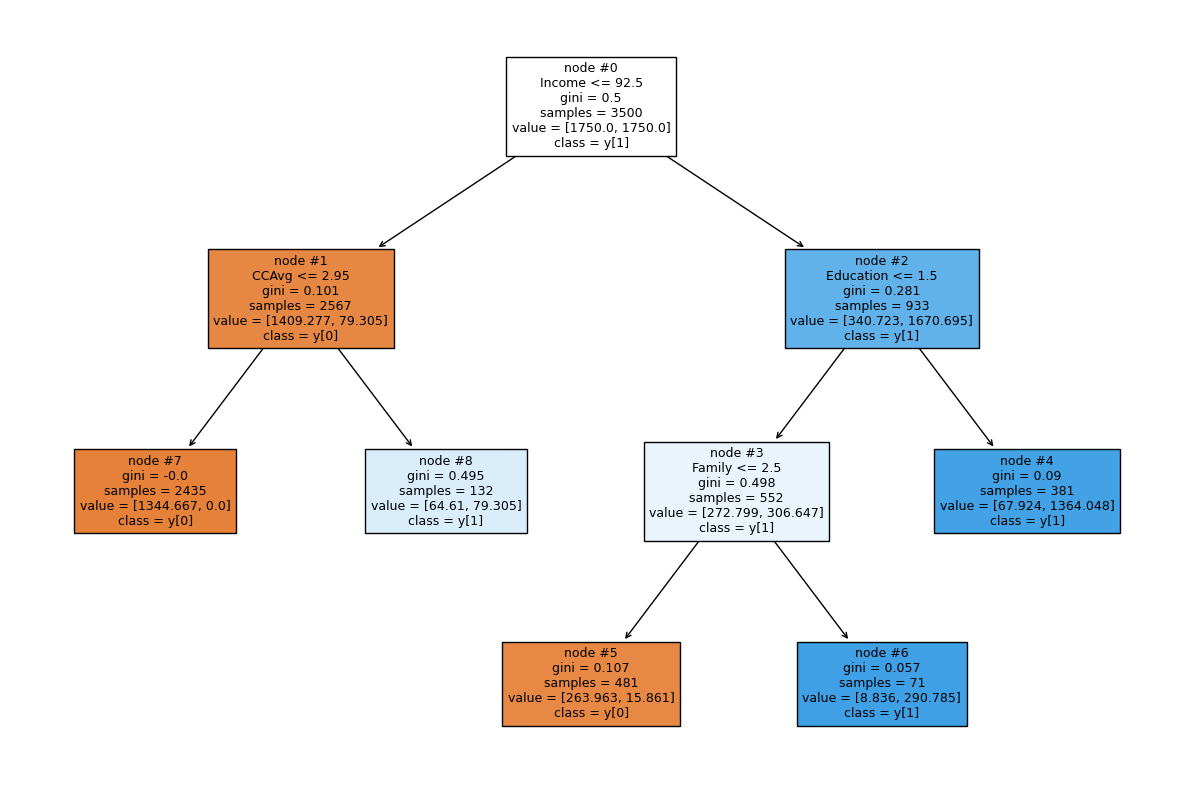

<IPython.core.display.Javascript object>

In [100]:
# Visualize the grid-search decision tree
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

  * __This is an excellent result, outperforming the simple pre-pruning option__

In [101]:
# Text report showing the rules of the grid-search decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



<IPython.core.display.Javascript object>

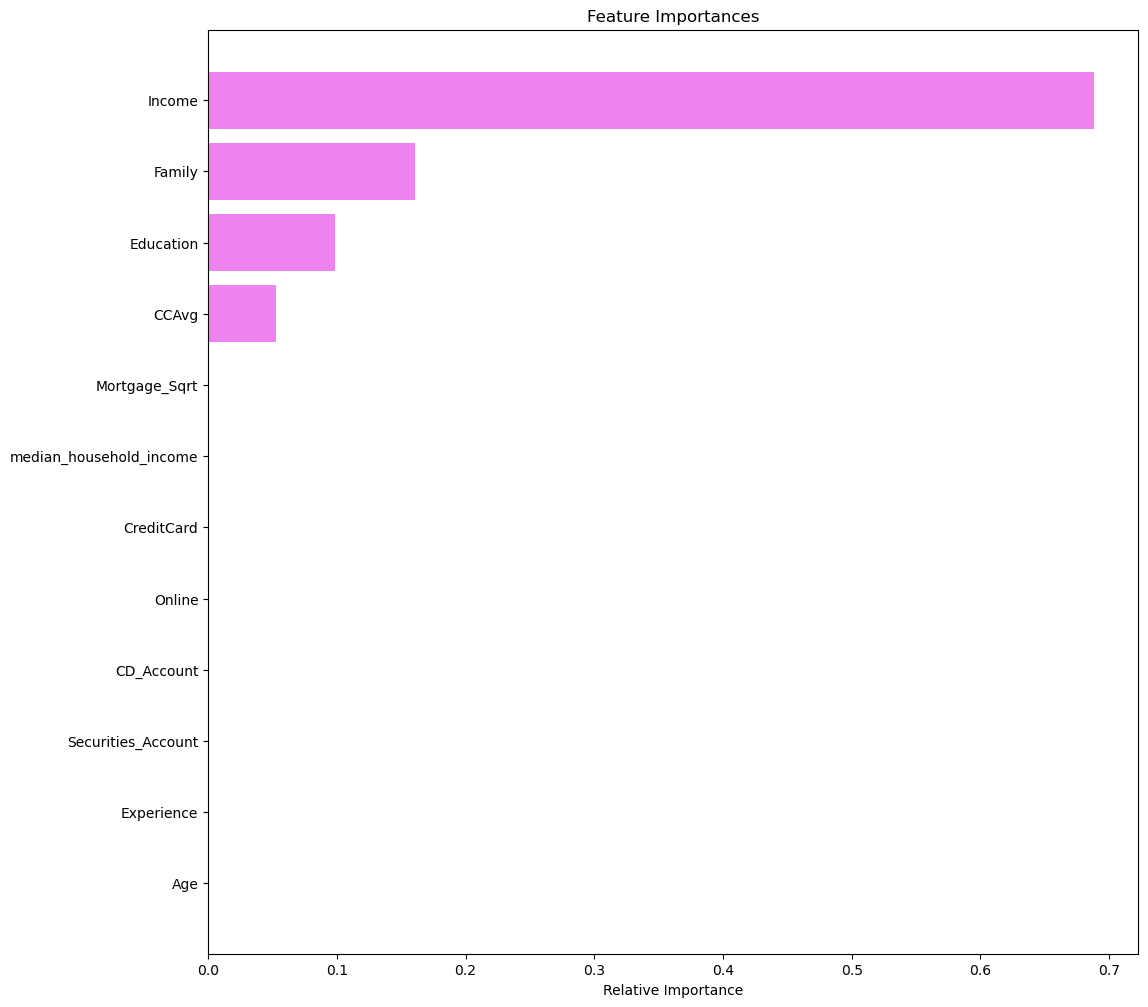

<IPython.core.display.Javascript object>

In [102]:
# visualize the grid-search feature importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

  * We ended up with a depth of four nodes, but the estimator tested through 10 nodes
  * The relative importances are consistent

### Minimal Cost Complexity Pruning

In [103]:
%%time
# Generate our classifier model, and capture the alphas and impurities from the pruning path
clf = DecisionTreeClassifier(class_weight="balanced",random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Wall time: 6.01 ms


<IPython.core.display.Javascript object>

In [104]:
# list the alphas and impurities at each step
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -7.751421e-15
1   3.503386e-19 -7.751071e-15
2   3.853725e-19 -7.750685e-15
3   3.853725e-19 -7.750300e-15
4   5.255079e-19 -7.749774e-15
5   1.313770e-18 -7.748461e-15
6   3.573454e-18 -7.744887e-15
7   1.257806e-17 -7.732309e-15
8   1.537634e-04  3.075267e-04
9   1.568682e-04  6.212631e-04
10  1.574681e-04  9.361994e-04
11  2.851861e-04  1.506572e-03
12  2.857143e-04  1.792286e-03
13  2.857143e-04  2.078000e-03
14  2.857143e-04  2.649429e-03
15  2.998950e-04  3.549114e-03
16  3.035700e-04  6.281244e-03
17  3.130853e-04  6.907415e-03
18  5.065559e-04  8.933638e-03
19  5.839354e-04  9.517574e-03
20  5.900285e-04  1.010760e-02
21  6.560652e-04  1.076367e-02
22  6.726470e-04  1.345426e-02
23  7.538167e-04  1.420807e-02
24  9.269294e-04  1.513500e-02
25  1.177963e-03  1.631296e-02
26  1.341612e-03  1.765458e-02
27  1.693744e-03  2.104206e-02
28  1.878334e-03  2.292040e-02
29  1.981730e-03  2.688386e-02
30  2.150414e-03  2.903427e-02
31  2.375809e-03  3.141008e-02
32  3.344493e-03  3.475457e-02
33  3.602932e-03  4.196044e-02
34  3.729690e-03  4.569013e-02
35  4.920880e-03  5.061101e-02
36  1.007808e-02  7.076717e-02
37  2.255792e-02  9.332509e-02
38  5.564782e-02  2.046207e-01
39  2.953793e-01  5.000000e-01

<IPython.core.display.Javascript object>

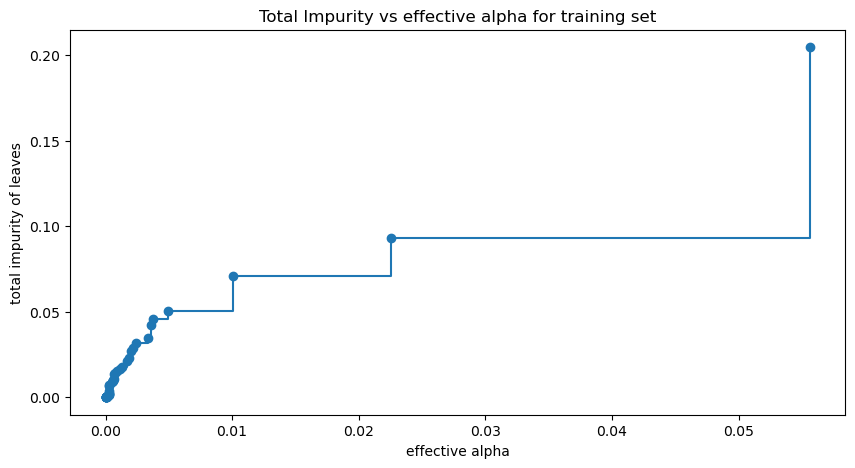

<IPython.core.display.Javascript object>

In [105]:
# plot aplhas vs. impurities for the training set path
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [106]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992315
Wall time: 159 ms


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

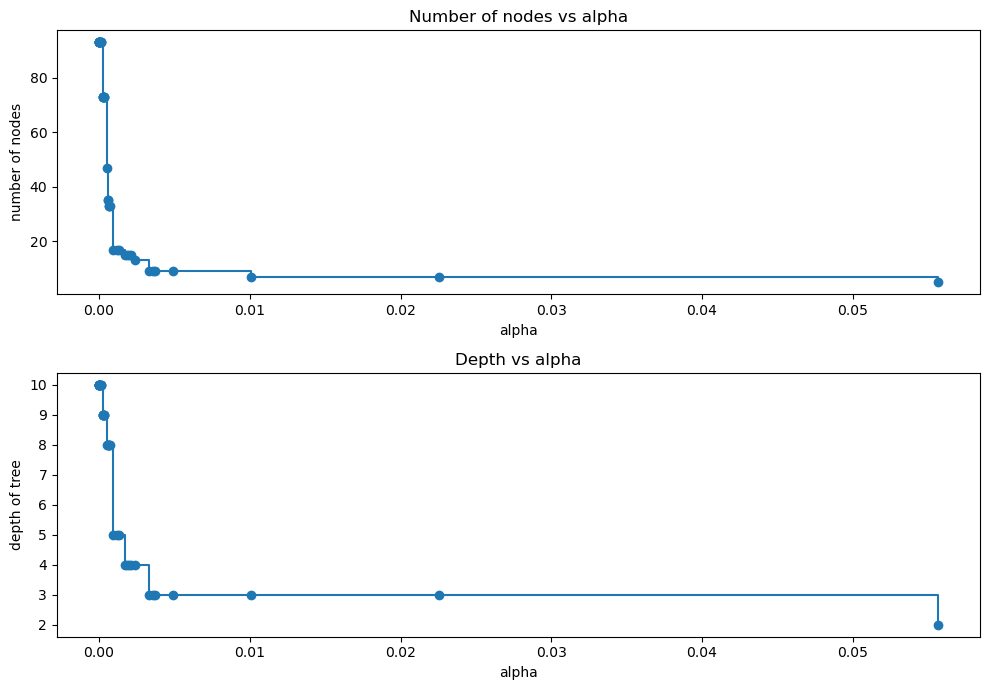

<IPython.core.display.Javascript object>

In [107]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

__Accuracy versus alpha for the train and test datasets__

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 98% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [108]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

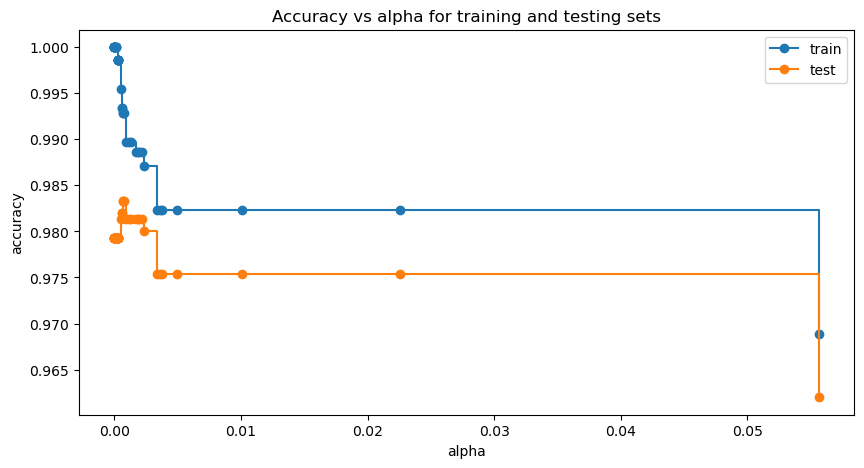

<IPython.core.display.Javascript object>

In [109]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [110]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.000656065210862148, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.9833333333333333


<IPython.core.display.Javascript object>

__That's great accuracy, but for this application we need to optimize for recall__

*Let's plot out our recall values*

In [111]:
%%time
# Training data recall
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

Wall time: 64.8 ms


<IPython.core.display.Javascript object>

In [112]:
%%time
# Test data recall
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

Wall time: 54.1 ms


<IPython.core.display.Javascript object>

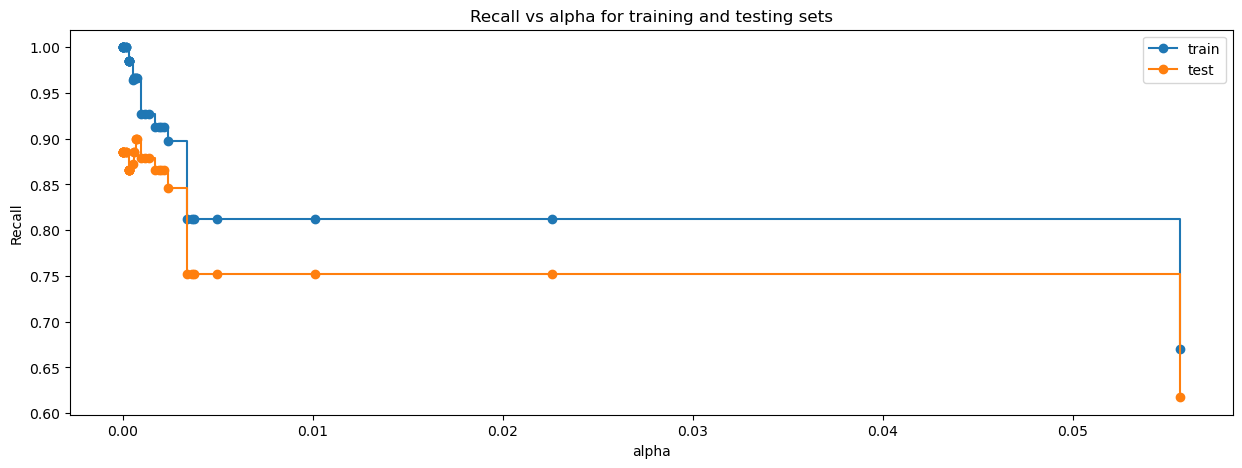

<IPython.core.display.Javascript object>

In [113]:
# Plot recall versus alpha for testing and training datasets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [114]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000656065210862148, random_state=1)


<IPython.core.display.Javascript object>

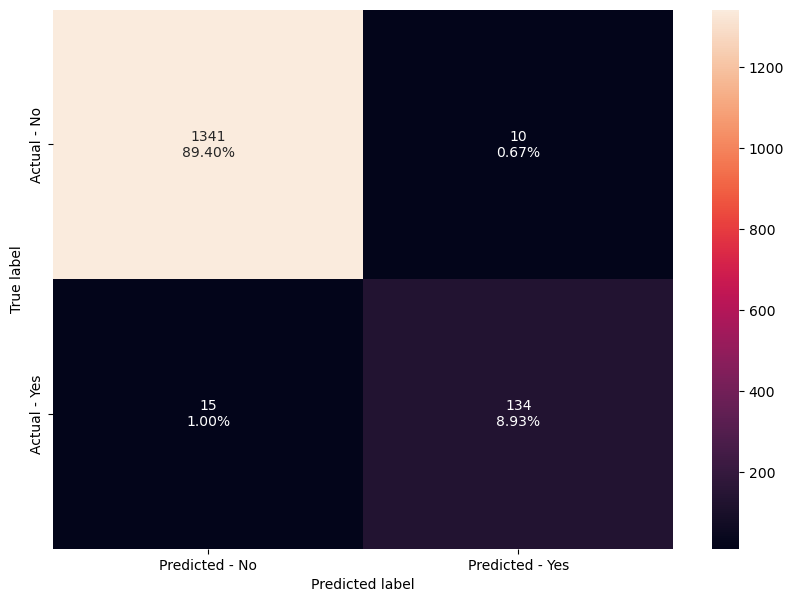

<IPython.core.display.Javascript object>

In [115]:
make_confusion_matrix(best_model, y_test)

In [116]:
# Recall on train and test
recalls_ccp = get_recall_score(best_model)
recall_train_ccp = recalls_ccp[0]
recall_test_ccp = recalls_ccp[1]

Recall on training set :  0.9667673716012085
Recall on test set :  0.8993288590604027


<IPython.core.display.Javascript object>

  * Post-pruning yields the best recall on both training and test data, with a reasonably generalized model

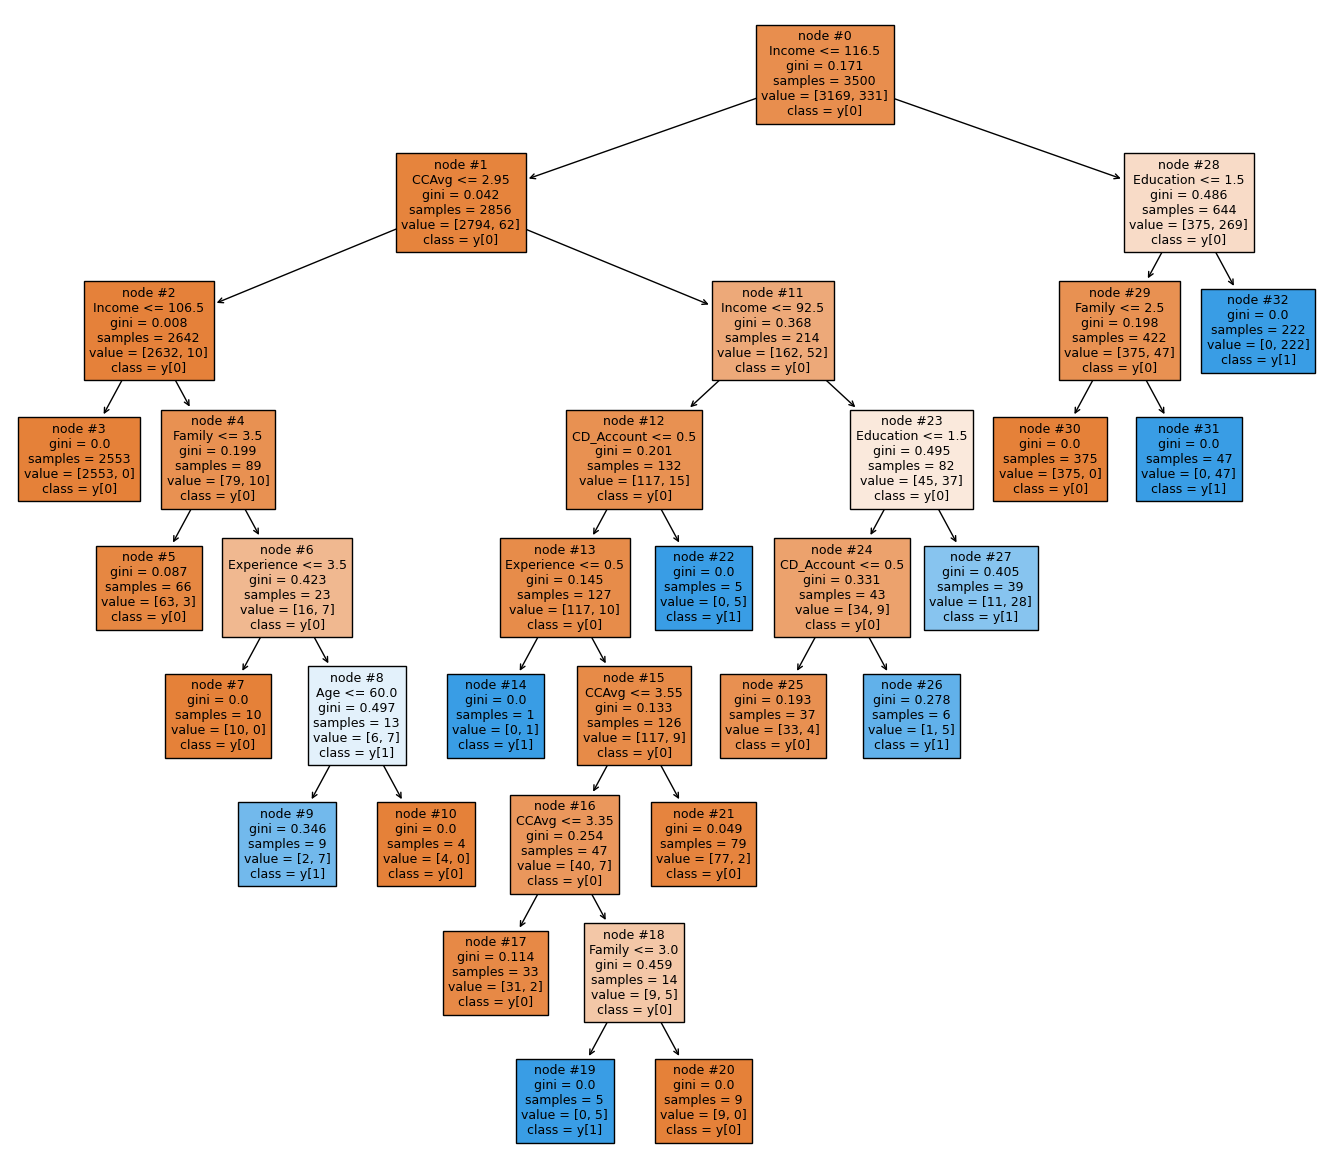

<IPython.core.display.Javascript object>

In [117]:
# Visualize the post-pruned cost-complexity decision tree
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [118]:
# Text report showing the rules of the minimum cost-complexity decision tree
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |  

<IPython.core.display.Javascript object>

In [119]:
# List the cost-complexity model importance of our features, in order
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education                0.430462
Income                   0.319735
Family                   0.165225
CCAvg                    0.045288
CD_Account               0.024353
Experience               0.008935
Age                      0.006001
Securities_Account       0.000000
Online                   0.000000
CreditCard               0.000000
median_household_income  0.000000
Mortgage_Sqrt            0.000000


<IPython.core.display.Javascript object>

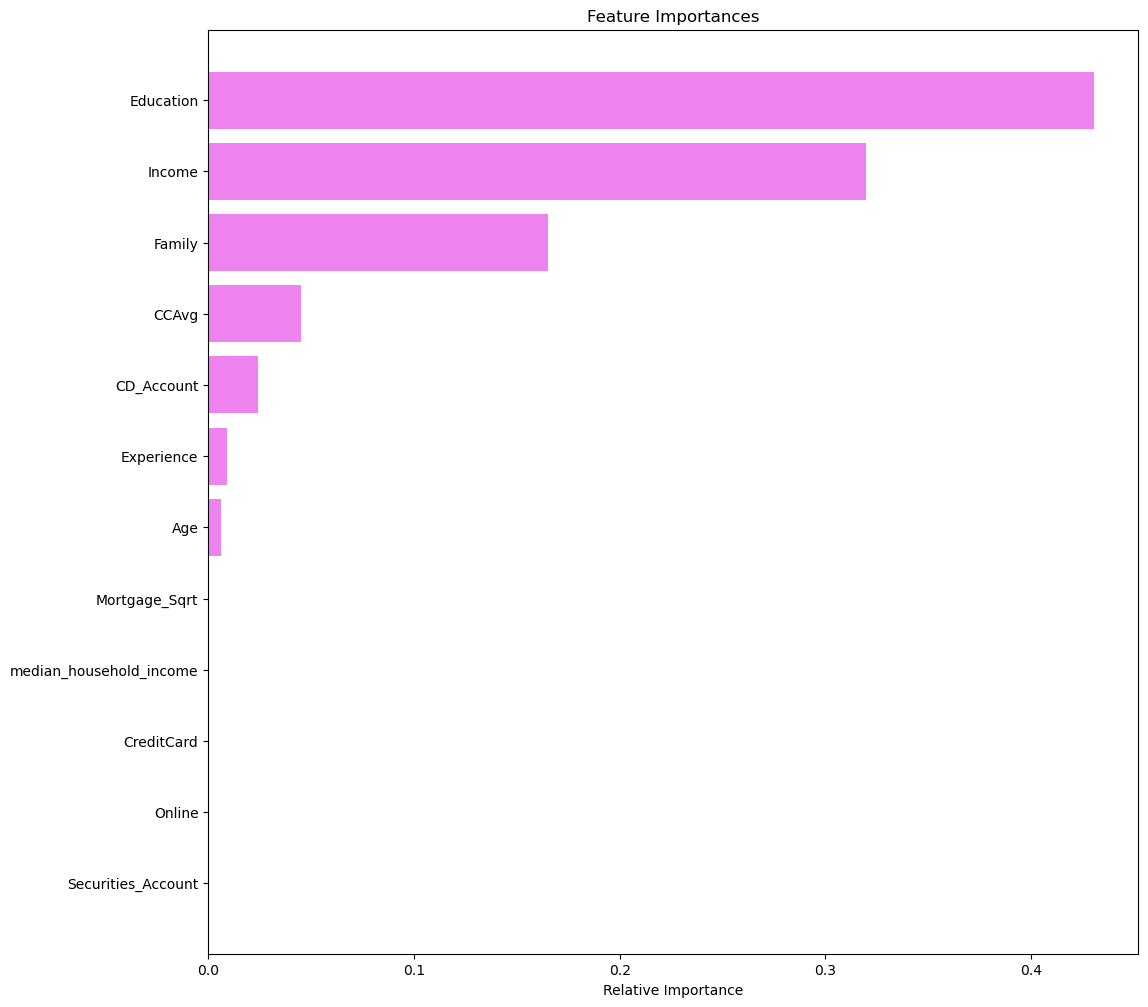

<IPython.core.display.Javascript object>

In [120]:
# Graph the cost-complexity model importance of our features
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Summarize the performance of the decision tree models

In [121]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with restricted maximum depth",
            "Decision treee with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [
            recall_train_full,
            recall_train_pre_prune,
            recall_train_hyper,
            recall_train_ccp,
        ],
        "Test_Recall": [
            recall_test_full,
            recall_test_pre_prune,
            recall_test_hyper,
            recall_test_ccp,
        ],
        "Test Accuracy": [
            dTree.score(X_test, y_test),
            dTree1.score(X_test, y_test),
            estimator.score(X_test, y_test),
            best_model.score(X_test, y_test),
        ],
    }
)
comparison_frame

Model  Train_Recall  Test_Recall  \
0                  Initial decision tree model      1.000000     0.852349   
1  Decision tree with restricted maximum depth      0.969789     0.926174   
2    Decision treee with hyperparameter tuning      0.990937     0.979866   
3              Decision tree with post-pruning      0.966767     0.899329   

   Test Accuracy  
0       0.973333  
1       0.955333  
2       0.930000  
3       0.983333

<IPython.core.display.Javascript object>

#### Observations
  * The __decision tree with hyperparameter tuning__ is producing the best result, with recall values for test and train very close together, and accuracy > 90%. 
  * The key insight for me was to limit the options for the hyperparameter estimator to consider a minimum depth of 4. 
  * This was already demonstrated to produce excellent results with pre-pruning
  * Allowing all depths consistently produced an over-fitted model at a depth of 3. That tells me that there's nothing in the estimator modeling that would recognize and reject that; *it requires manual tuning.*

## Business Recommendations

#### Predictive Modeling
  * __The best predictive results were achieved using the decision tree with hyperparameter tuning.__
  * __This model is tuned to favor all possible candidates for loans, and may result in some offers extended to customers who are not interested.__
  * __This model should minimize "missing" potential customers who might otherwise be interested in a loan.__

#### Target Customers 
  * The most important contributing factors for potential loan customers include:
    * Customers with higher income
    * Customers with larger families
    * Customers who have achieved a higher level of education
    * Customers who spend more monthly on credit card purchases

#### Target locations for the campaign
  * We identified the top counties by average household income where we've had customers borrow with personal loans in step 40 of this notebook
  * Given the intersection of higher average household income and demonstrated willingness to borrow, these counties would be the best places to prioritize marketing efforts.
  * The graph below summarizes:

#### Target Counties Plot

In [122]:
# Let's segment the data into customers living in counties with higher household income,
# A higher average CC spend, and a demonstrated interest in loans
Loan_targets = customers_full.loc[
    (customers_full["median_household_income"] > 100000)
    & (customers_full["Personal_Loan"] == 1)
    & (customers_full["CCAvg"] > 1.0)
]

<IPython.core.display.Javascript object>

In [123]:
grouped_customers = Loan_targets.groupby("county")["Income"].mean()
grouped_customers = grouped_customers.reset_index()
grouped_customers = grouped_customers.rename(columns={"Income": "Mean_Income"})

<IPython.core.display.Javascript object>

In [124]:
sorted_counties = grouped_customers.sort_values(by="Mean_Income", ascending=False)

<IPython.core.display.Javascript object>

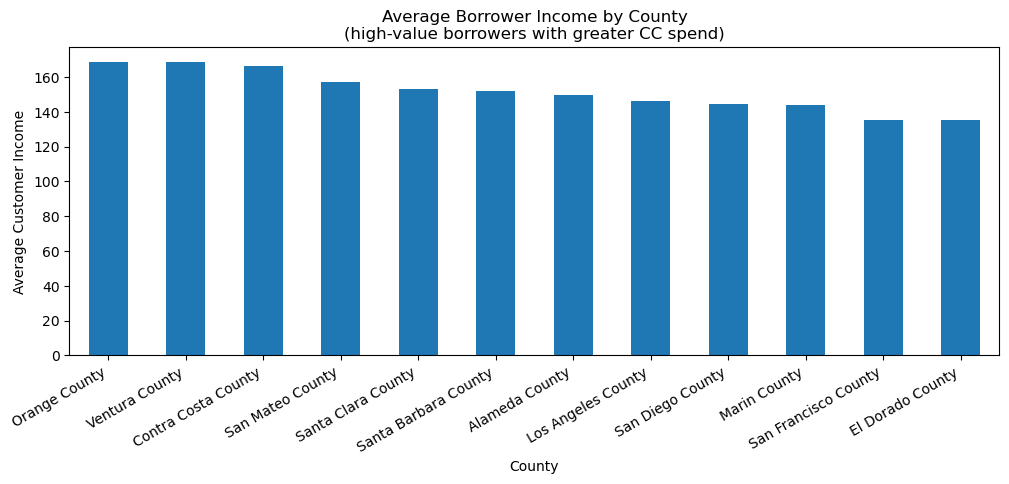

<IPython.core.display.Javascript object>

In [125]:
# Create a barplot
ax = sorted_counties.plot(
    kind="bar", x="county", y="Mean_Income", legend=False, figsize=(12, 4)
)

# Add labels to the barplot
ax.set_ylabel("Average Customer Income")
ax.set_xlabel("County")
ax.set_title(
    "Average Borrower Income by County\n(high-value borrowers with greater CC spend)"
)
ax.set_xticklabels(sorted_counties["county"], rotation=30, ha="right")
ax.tick_params(axis="x", labelsize=10)

This is a ranked graph of the counties with existing customers with incomes of greater than \\$100K\/yr, who have taken personal loans, and have a credit card spend of greater than \\$1000\/mo.

__For the marketing campaign, these are the most promising regions to focus messaging and targeted offers__